# Model: Linear Regression with three cross validation methods.

Holdout 20% method has considerable changes of training and test MSE due to the random nature of the split. In some versions both are very good sometimes bad. This problem does not arise to that extent for the K-10 folds method. The values are more stable and in the last version lower. The Test MSE is higher for the less flexible linear regression model compared to the training MSE.
The Loo method (laptop could not handle the data, so I used book instead of book1 here) has a very high test MSE compaerd to the training MSE because the test set consists only of one observation and the linear regression model is not flexible.

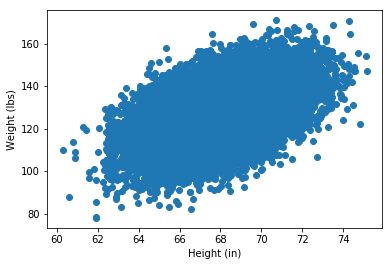

In [1]:
#predict weight with height
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as optimization

#load data
data=pd.read_excel('Book1.xlsx')
mat1=data.as_matrix()
data=np.transpose(data.as_matrix())

#plot the data
x=data[1]
y=data[2]
plt.scatter(x,y)
plt.xlabel("Height (in)")
plt.ylabel("Weight (lbs)")
plt.show()

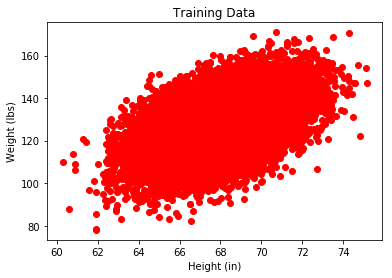

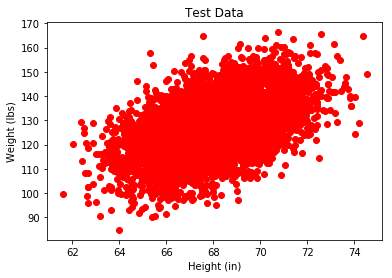

In [2]:
#holdout 20% method of the linear model validation
matr = np.arange(len(data[0]))
selection1 = np.random.permutation(matr)
num = int(0.8*len(data[0]))
selection = [selection1[i] for i in range(0,num)]
#print(selection)    

dataTrain = np.array([i for i in np.transpose(data) if i[0] in selection])
dataTest = np.array([i for i in np.transpose(data) if i[0] not in selection])
dataTrain = np.transpose(dataTrain)
dataTest = np.transpose(dataTest)

plt.title("Training Data")
plt.scatter(dataTrain[1],dataTrain[2], c='red')
plt.xlabel("Height (in)")
plt.ylabel("Weight (lbs)")
plt.show()

plt.title("Test Data")
plt.scatter(dataTest[1],dataTest[2], c='red')
plt.xlabel("Height (in)")
plt.ylabel("Weight (lbs)")
plt.show()

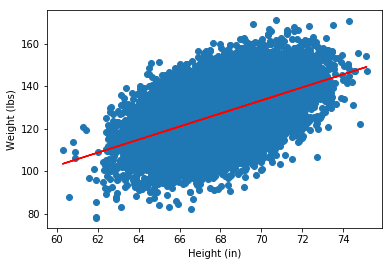

MSE= 101.204151343


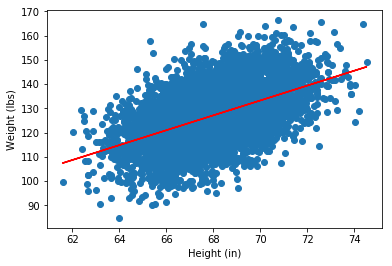

MSE= 103.141877104


In [3]:
#plot the data
x=dataTrain[1]
y=dataTrain[2]
plt.scatter(x,y)
plt.xlabel("Height (in)")
plt.ylabel("Weight (lbs)")

def func(x,a,b): return a+b*x
x0=np.array([0.0,0.0])
optpar=optimization.curve_fit(func, x, y, x0)

a=optpar[0][0]
b=optpar[0][1]
plt.plot(x,a+b*x,"r")
plt.show()

s=0
for n in range(np.size(x)):
    s=s+(y[n]-(a+b*x[n]))**2
    
print("MSE=", s/np.size(x))

#plot the data
x=dataTest[1]
y=dataTest[2]
plt.scatter(x,y)
plt.xlabel("Height (in)")
plt.ylabel("Weight (lbs)")

plt.plot(x,a+b*x,"r")
plt.show()

s=0
for n in range(np.size(x)):
    s=s+(y[n]-(a+b*x[n]))**2
    
print("MSE=", s/np.size(x))

MSE= 101.821752002


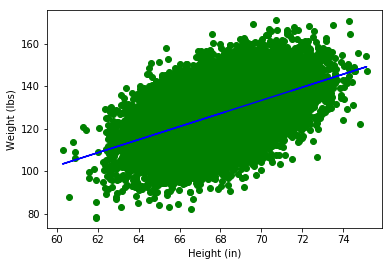

MSE= 101.333727485


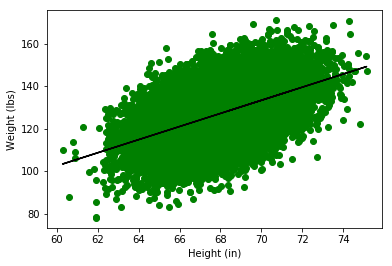

MSE= 101.44445643


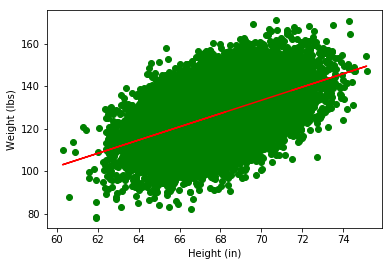

MSE= 102.129914492


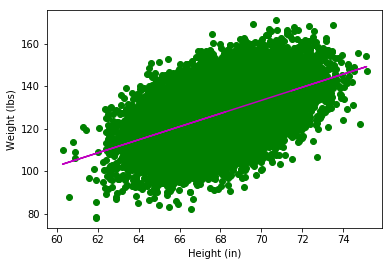

MSE= 101.620083189


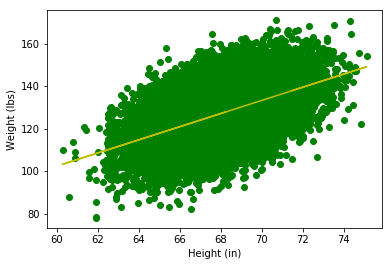

MSE= 101.841144103


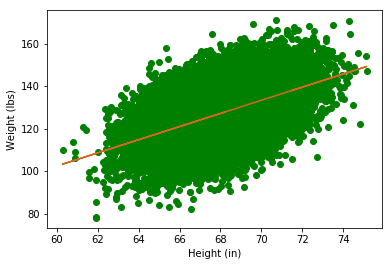

MSE= 101.233673929


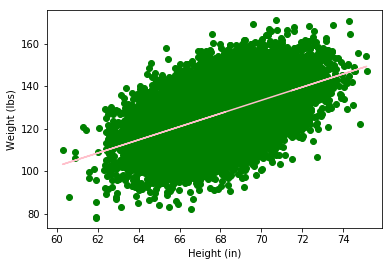

MSE= 101.368878095


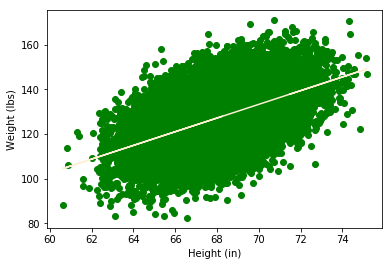

MSE= 101.627902542


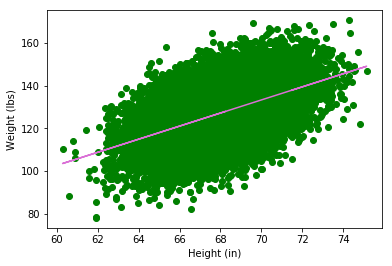

MSE= 101.471792476


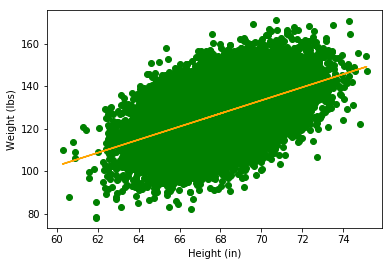

MSE= 99.512806275


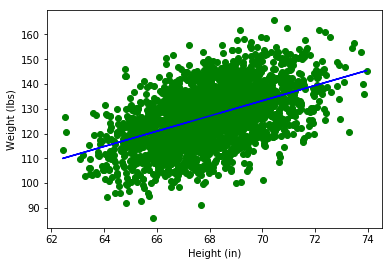

MSE= 103.909303938


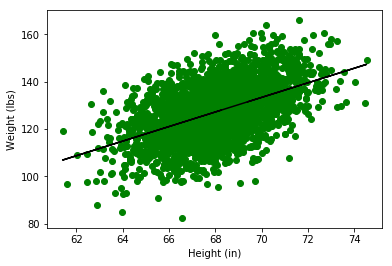

MSE= 102.95283327


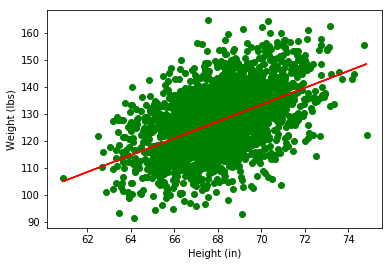

MSE= 96.7393494357


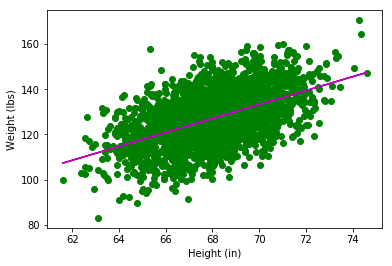

MSE= 101.329270308


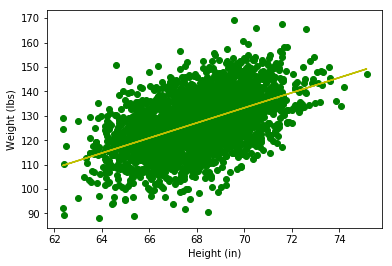

MSE= 99.336378426


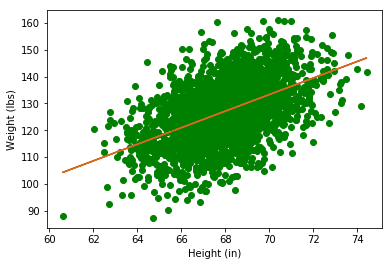

MSE= 104.808140915


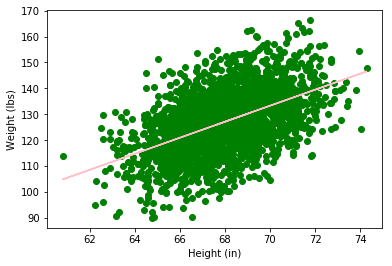

MSE= 103.601585553


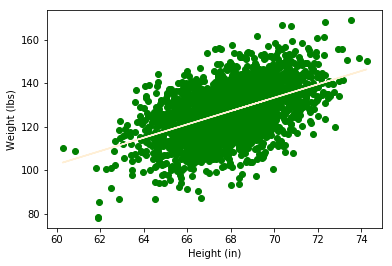

MSE= 101.272351325


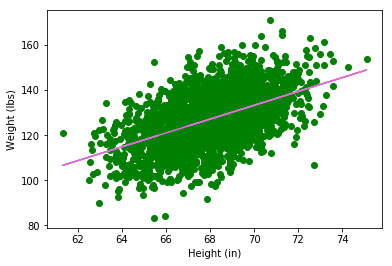

MSE= 102.661160992


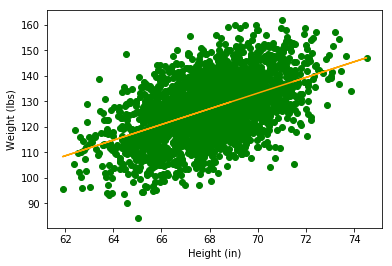

Average Training-MSE: 101.589332474
Average Test-MSE: 101.612318044


In [4]:
#K fold cross validation of the linear model for K=10
mat1=np.random.permutation(mat1)
spl=np.array_split(mat1,10)
test1=spl[0]
data1=np.vstack((spl[1],spl[2],spl[3],spl[4],spl[5],spl[6],spl[7],spl[8],spl[9]))
test2=spl[1]
data2=np.vstack((spl[0],spl[2],spl[3],spl[4],spl[5],spl[6],spl[7],spl[8],spl[9]))
test3=spl[2]
data3=np.vstack((spl[1],spl[0],spl[3],spl[4],spl[5],spl[6],spl[7],spl[8],spl[9]))
test4=spl[3]
data4=np.vstack((spl[1],spl[2],spl[0],spl[4],spl[5],spl[6],spl[7],spl[8],spl[9]))
test5=spl[4]
data5=np.vstack((spl[1],spl[2],spl[3],spl[0],spl[5],spl[6],spl[7],spl[8],spl[9]))
test6=spl[5]
data6=np.vstack((spl[1],spl[2],spl[3],spl[4],spl[0],spl[6],spl[7],spl[8],spl[9]))
test7=spl[6]
data7=np.vstack((spl[1],spl[2],spl[3],spl[4],spl[5],spl[0],spl[7],spl[8],spl[9]))
test8=spl[7]
data8=np.vstack((spl[1],spl[2],spl[3],spl[4],spl[5],spl[6],spl[0],spl[8],spl[9]))
test9=spl[8]
data9=np.vstack((spl[1],spl[2],spl[3],spl[4],spl[5],spl[6],spl[7],spl[0],spl[9]))
test10=spl[9]
data10=np.vstack((spl[1],spl[2],spl[3],spl[4],spl[5],spl[6],spl[7],spl[8],spl[0]))
crosstest=[test1,test2,test3,test4,test5,test6,test7,test8,test9,test10]
crossdata=[data1,data2,data3,data4,data5,data6,data7,data8,data9,data10]


#plot the data
a=np.zeros((10))
b=np.zeros((10))
err=np.zeros((10))
color=np.array(['b','k','r','m','y','chocolate', 'pink', 'papayawhip', 'orchid','orange'])
sum1=0
for m in range(10):
    x=crossdata[m][:,1]
    y=crossdata[m][:,2]
    plt.scatter(x,y,c='green')
    plt.xlabel("Height (in)")
    plt.ylabel("Weight (lbs)")

    def func(x,a1,b1): return a1+b1*x
    x0=np.array([0.0,0.0])
    optpar=optimization.curve_fit(func,x,y,x0)

    a[m]=optpar[0][0]
    b[m]=optpar[0][1]

    plt.plot(x,a[m]+b[m]*x,color[m])
    #plt.show()

    s=0
    for n in range(np.size(x)):
        s=s+(y[n]-(a[m]+b[m]*x[n]))**2

    print("MSE=", s/np.size(x))
    err=s/np.size(x)
    sum1+=err
    plt.show()
sum2=0
#plot the data
for m in range(10):
    x=crosstest[m][:,1]
    y=crosstest[m][:,2]  
    plt.scatter(x,y,c='green')
    plt.xlabel("Height (in)")
    plt.ylabel("Weight (lbs)")

    plt.plot(x,a[m]+b[m]*x,color[m])

    s=0
    for n in range(np.size(x)):
        s=s+(y[n]-(a[m]+b[m]*x[n]))**2

    print("MSE=", s/np.size(x))
    err=s/np.size(x)
    sum2+=err
    plt.show()
print("Average Training-MSE:",sum1/10)
print("Average Test-MSE:",sum2/10)

MSE= 107.884127012


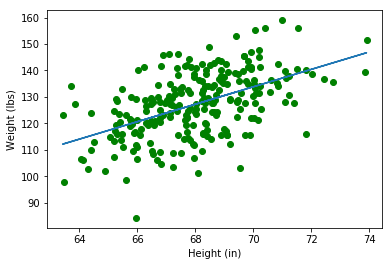

MSE= 5.54518787135


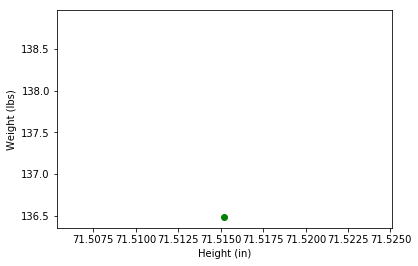

MSE= 106.08627046


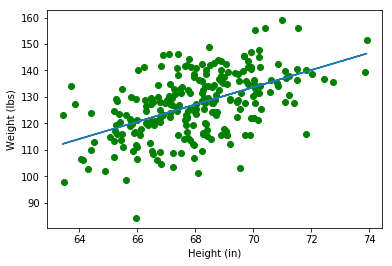

MSE= 454.109270308


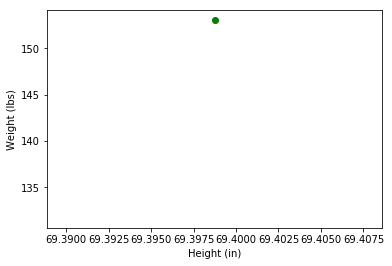

MSE= 107.069962376


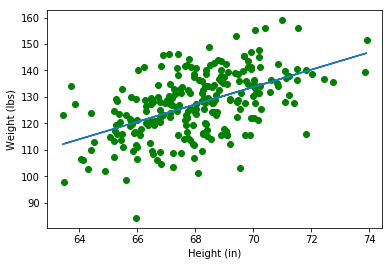

MSE= 208.207711059


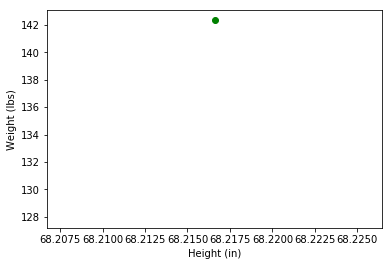

MSE= 106.631783996


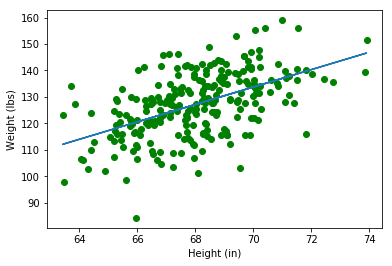

MSE= 317.319308689


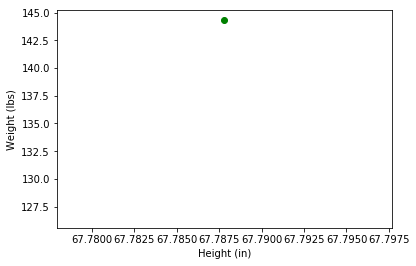

MSE= 107.748210217


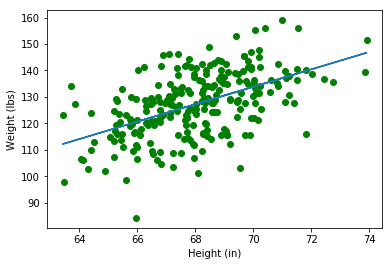

MSE= 39.3343264807


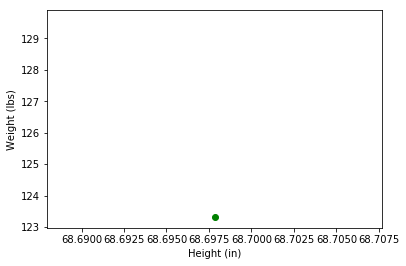

MSE= 107.624731131


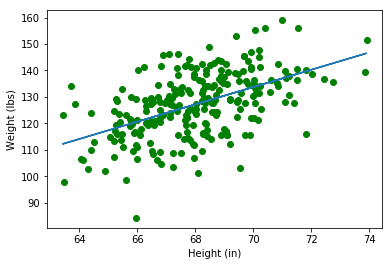

MSE= 70.3097638331


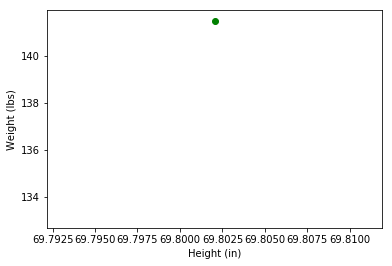

MSE= 107.878802674


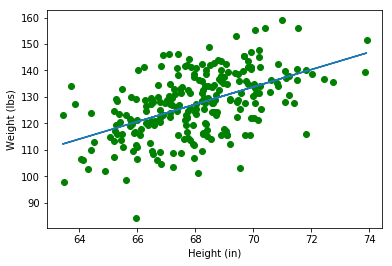

MSE= 6.82621335717


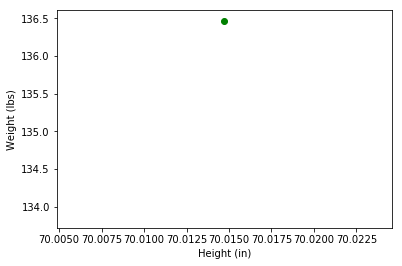

MSE= 107.047705678


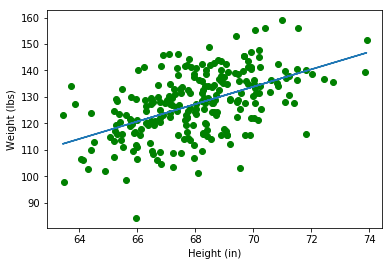

MSE= 213.741282111


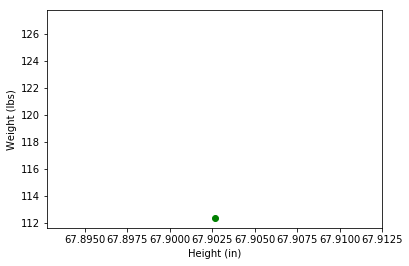

MSE= 107.878979763


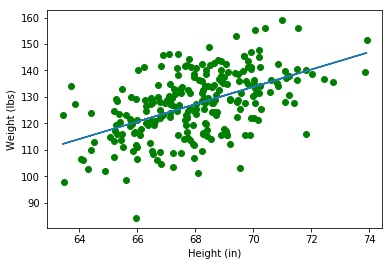

MSE= 6.76277233016


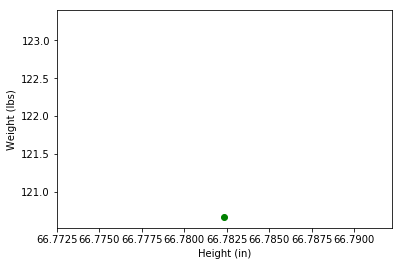

MSE= 107.797755435


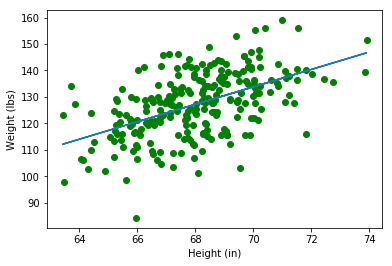

MSE= 27.044520327


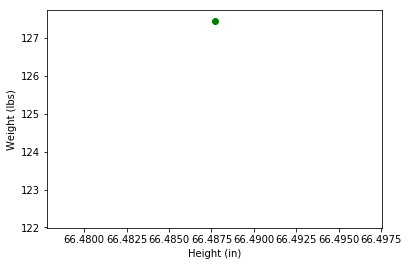

MSE= 107.335319784


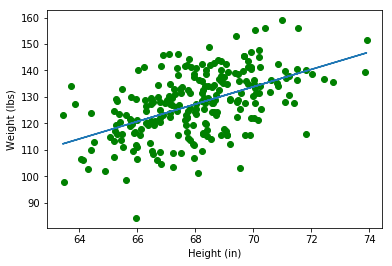

MSE= 142.145318416


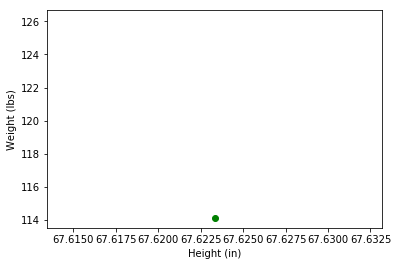

MSE= 107.877959195


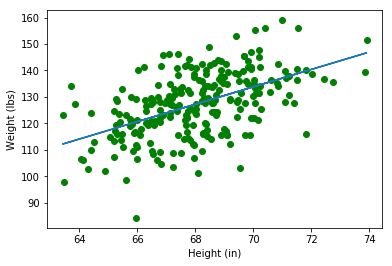

MSE= 7.00658171291


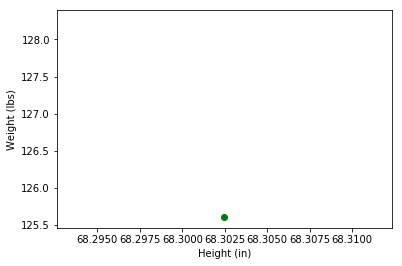

MSE= 107.891634185


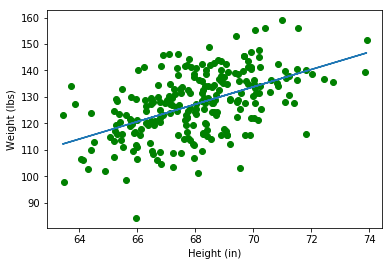

MSE= 3.60390106551


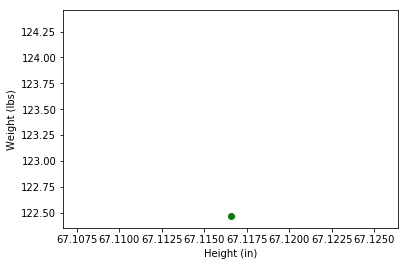

MSE= 107.314743907


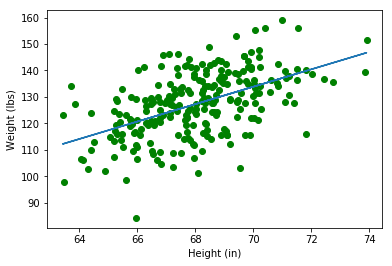

MSE= 147.259037373


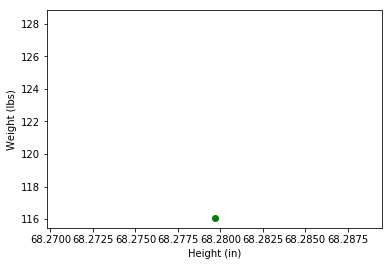

MSE= 107.878688271


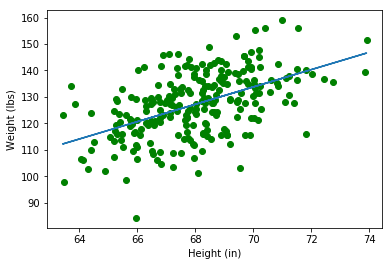

MSE= 6.89657788563


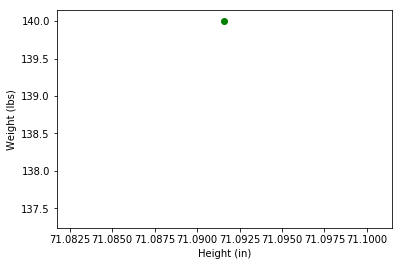

MSE= 107.689495467


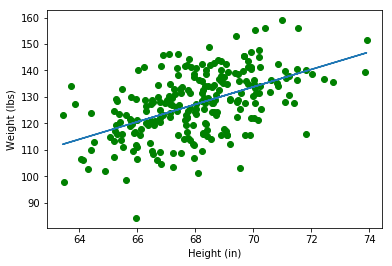

MSE= 54.0739494615


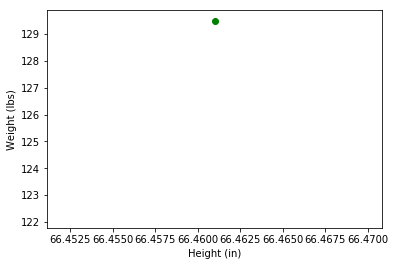

MSE= 107.158338873


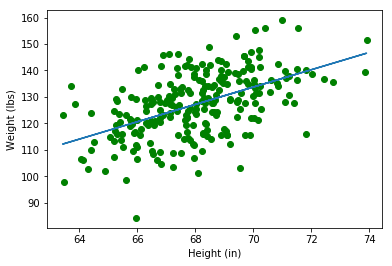

MSE= 186.277200606


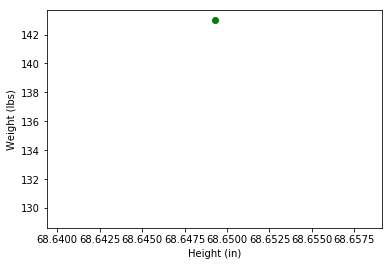

MSE= 107.906089528


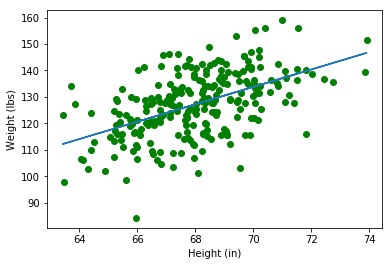

MSE= 0.00144685151119


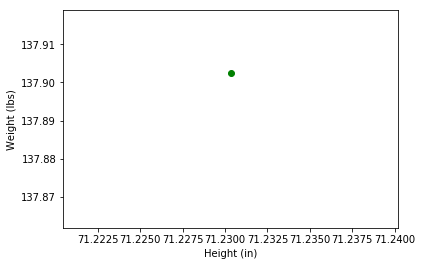

MSE= 107.905587287


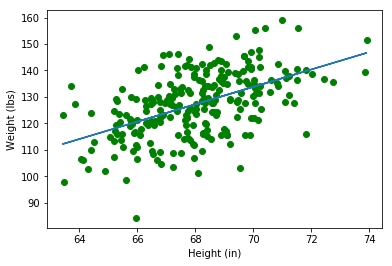

MSE= 0.126593488456


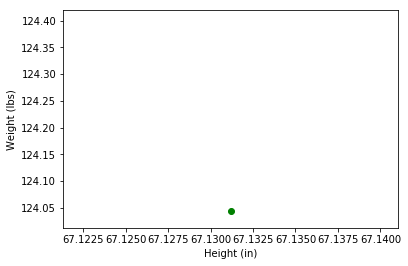

MSE= 107.046206675


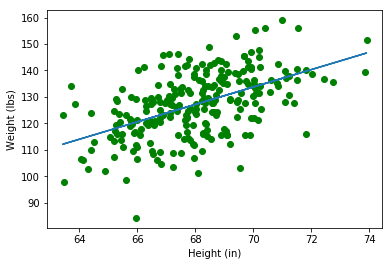

MSE= 214.118817909


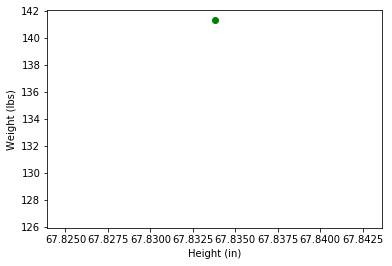

MSE= 107.17862608


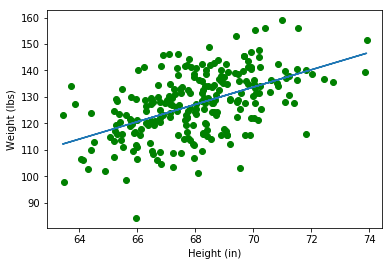

MSE= 181.293029721


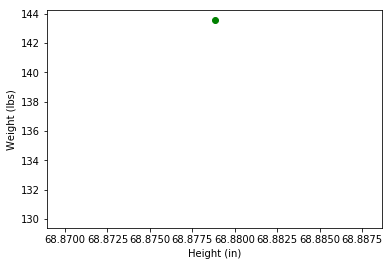

MSE= 107.034623552


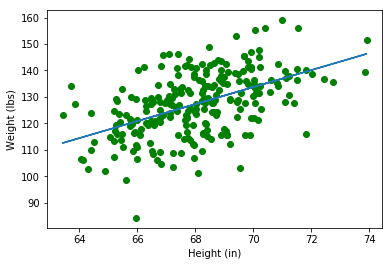

MSE= 221.968321681


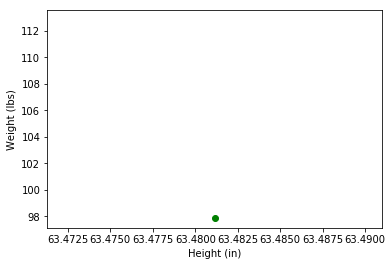

MSE= 107.90307464


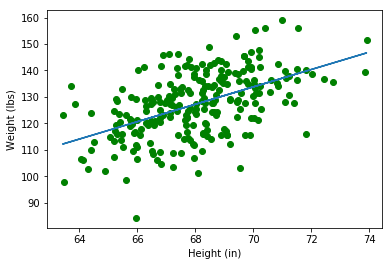

MSE= 0.752283719387


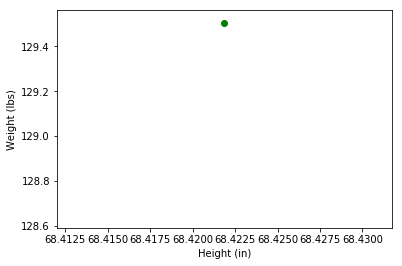

MSE= 106.892850385


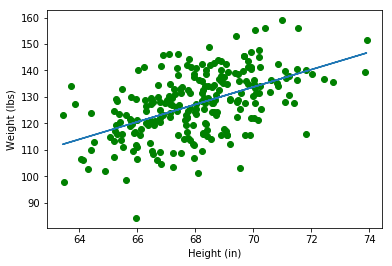

MSE= 252.336446074


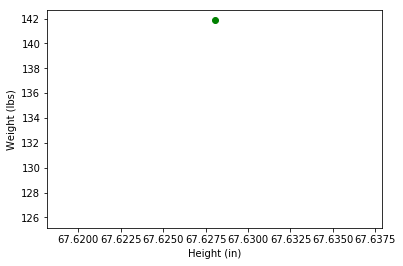

MSE= 107.801917425


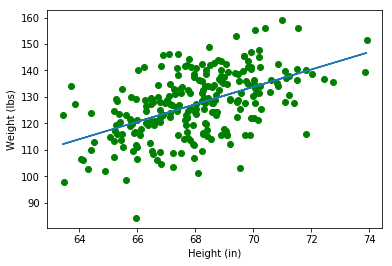

MSE= 25.9581495125


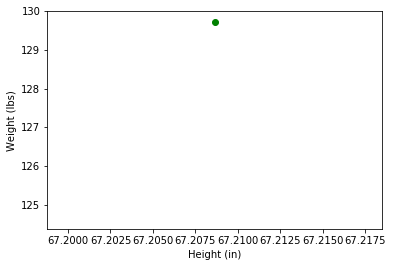

MSE= 107.767118672


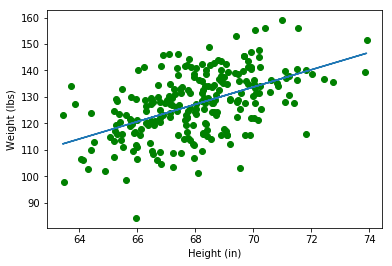

MSE= 34.9142581318


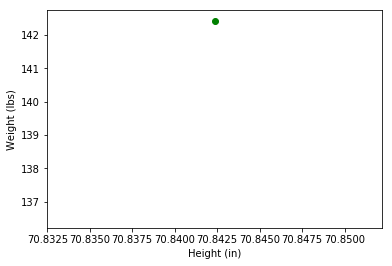

MSE= 107.762331373


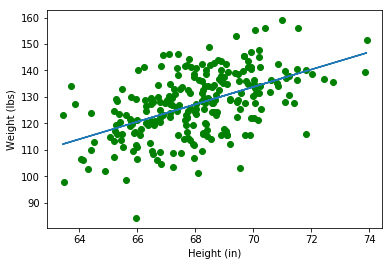

MSE= 35.8072861268


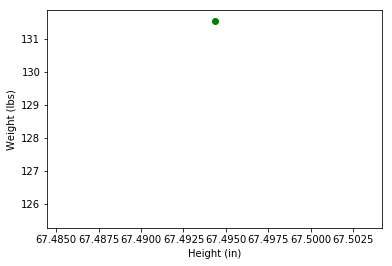

MSE= 107.098754298


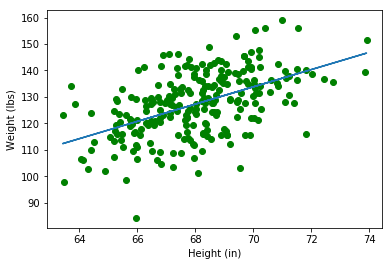

MSE= 201.503330914


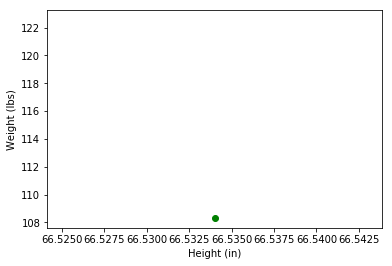

MSE= 107.806004065


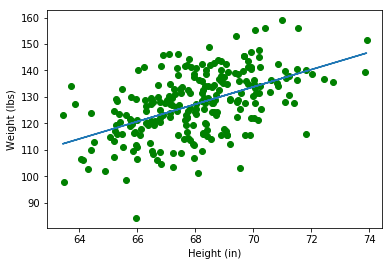

MSE= 25.1030890486


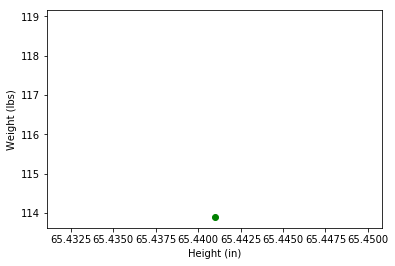

MSE= 104.50303783


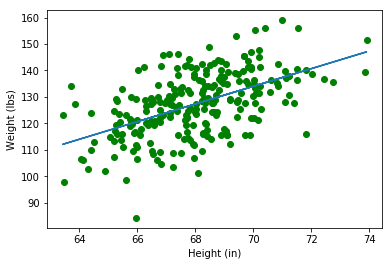

MSE= 849.520128202


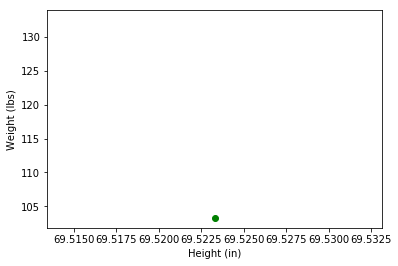

MSE= 107.904189461


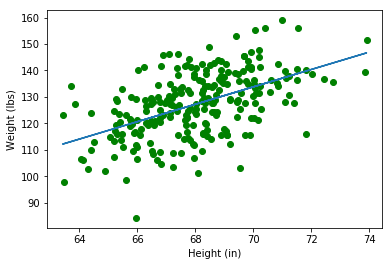

MSE= 0.477050324337


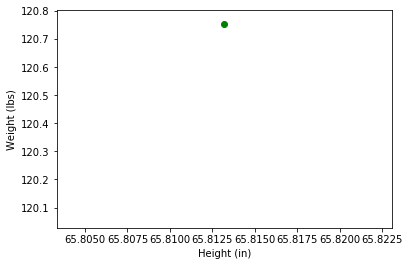

MSE= 107.903093512


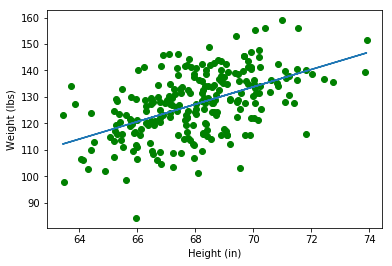

MSE= 0.747466271308


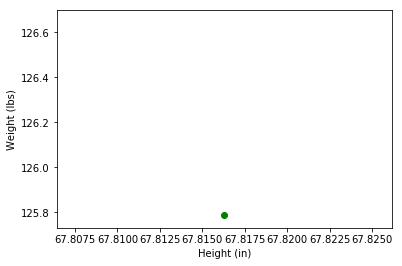

MSE= 107.905289773


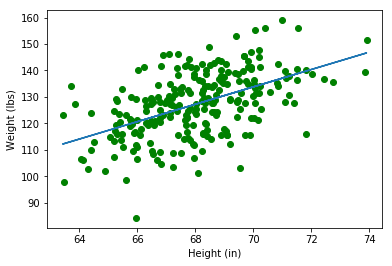

MSE= 0.202060081344


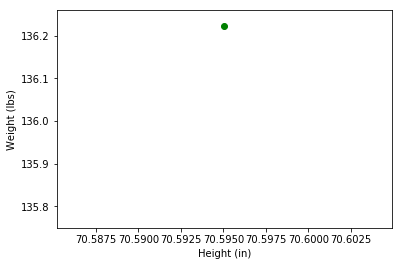

MSE= 107.905593822


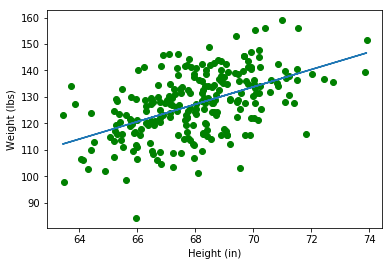

MSE= 0.126873878445


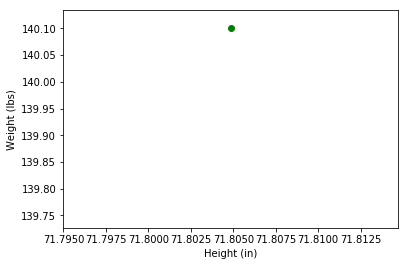

MSE= 107.881422893


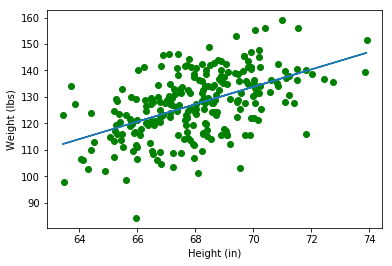

MSE= 6.1532225535


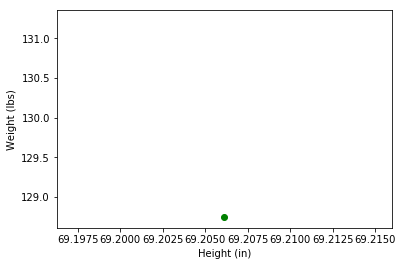

MSE= 106.521864153


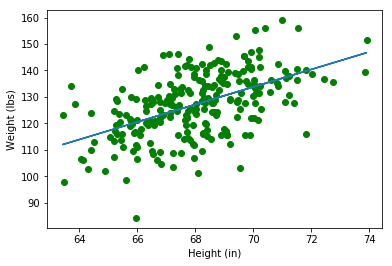

MSE= 345.216110383


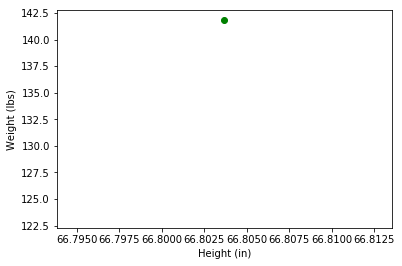

MSE= 107.808846853


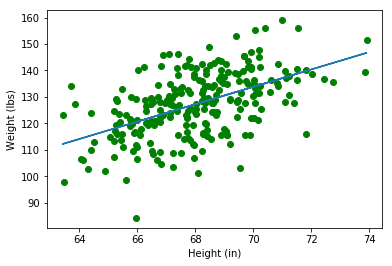

MSE= 24.2179621508


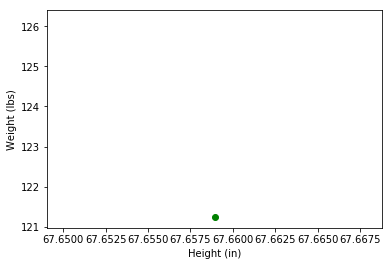

MSE= 107.815565727


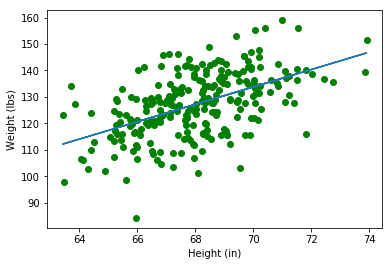

MSE= 22.5427860649


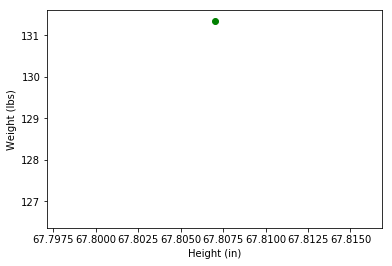

MSE= 107.671275767


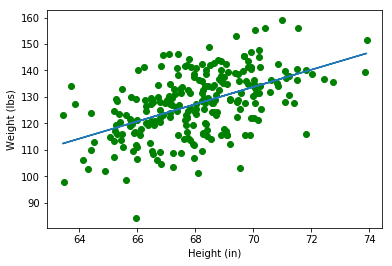

MSE= 59.4906756635


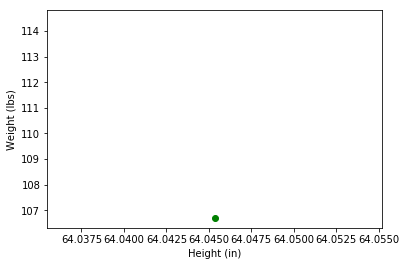

MSE= 107.813519527


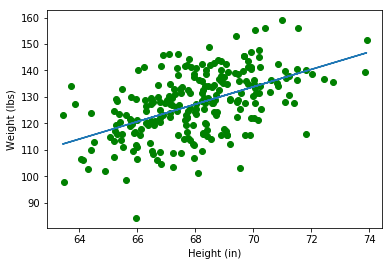

MSE= 23.059682889


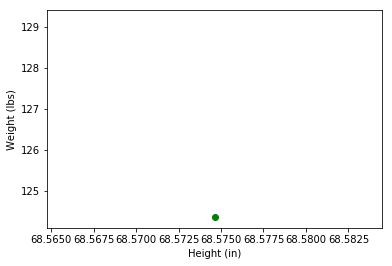

MSE= 107.714002103


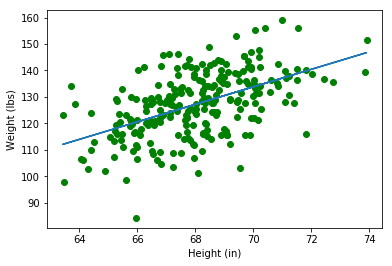

MSE= 48.2511336482


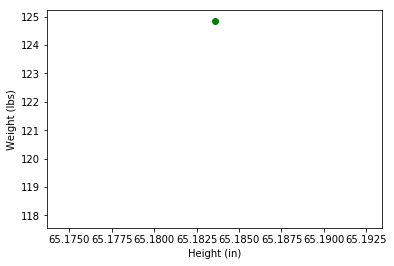

MSE= 107.708773338


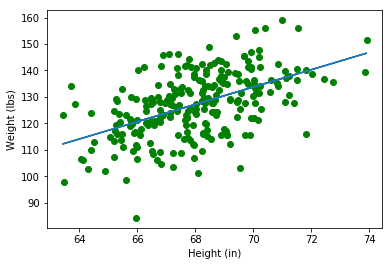

MSE= 49.2815647434


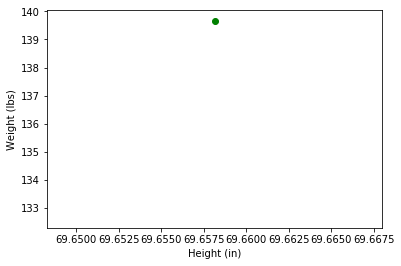

MSE= 107.482913982


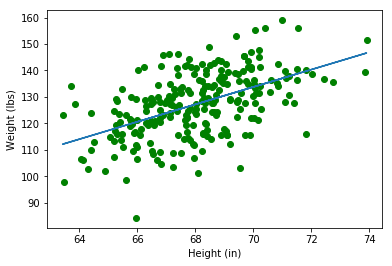

MSE= 105.372271728


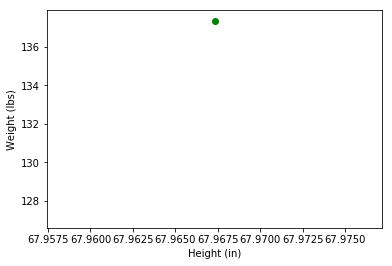

MSE= 107.089516979


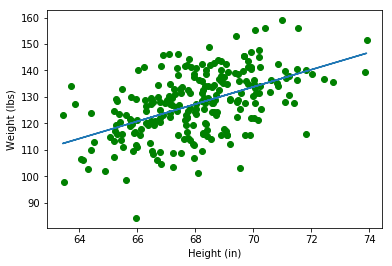

MSE= 204.241812847


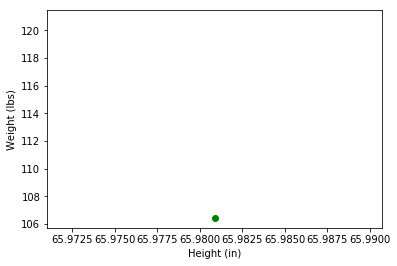

MSE= 107.904119483


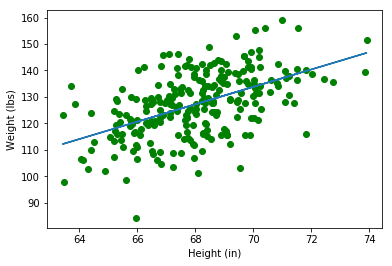

MSE= 0.49221498503


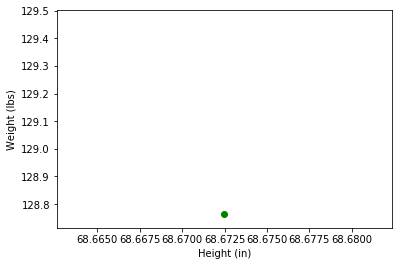

MSE= 105.924784326


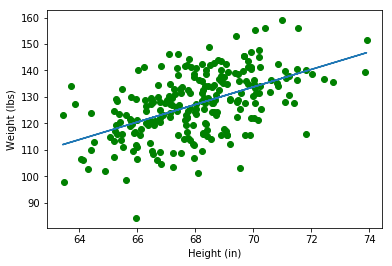

MSE= 494.025945507


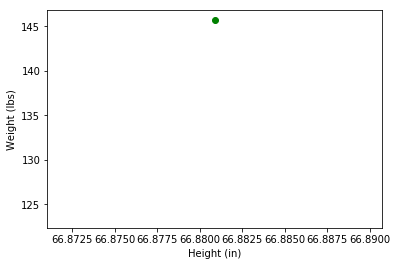

MSE= 107.544955099


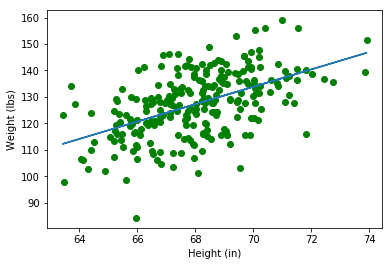

MSE= 89.9329110845


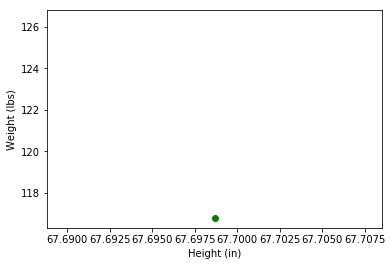

MSE= 107.467821571


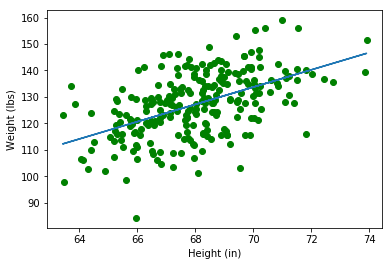

MSE= 109.528069866


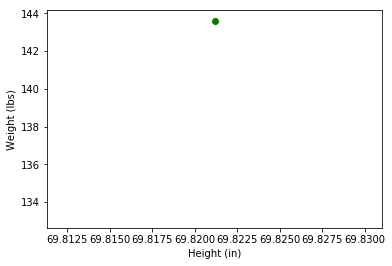

MSE= 107.837797147


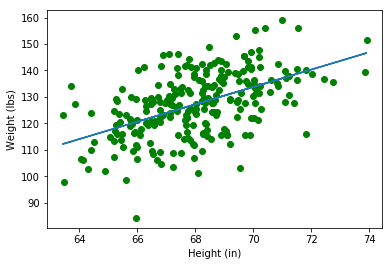

MSE= 17.0283045552


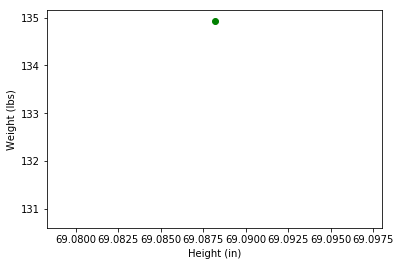

MSE= 107.167633605


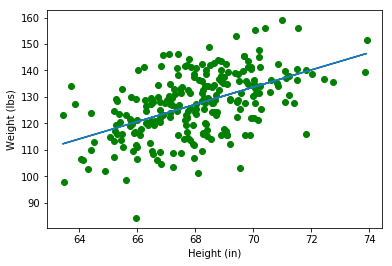

MSE= 184.618434086


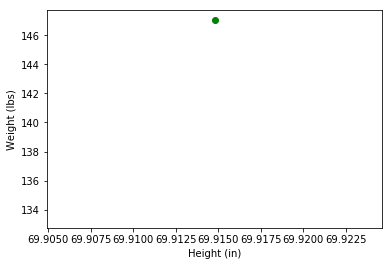

MSE= 107.899558067


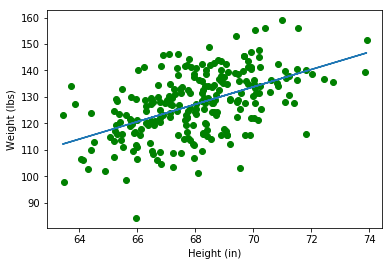

MSE= 1.62856373356


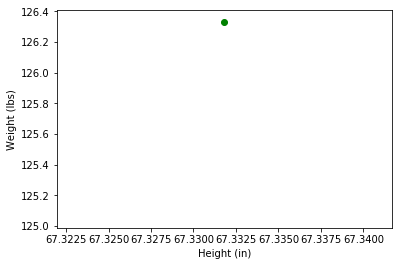

MSE= 107.559655819


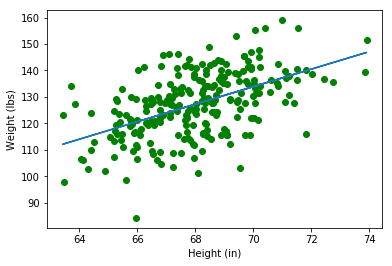

MSE= 86.7529141159


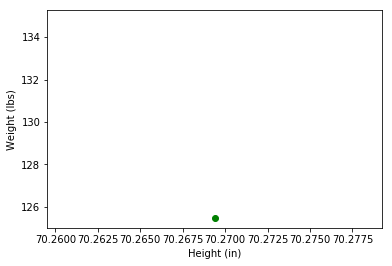

MSE= 106.973217017


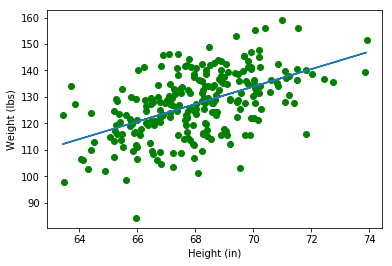

MSE= 232.596695955


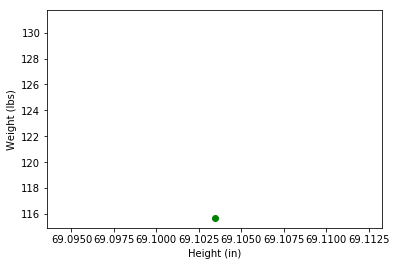

MSE= 107.810881387


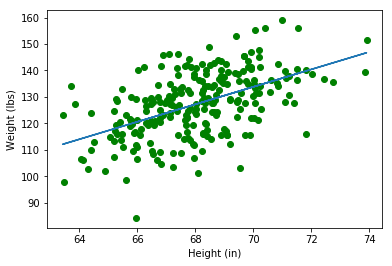

MSE= 23.8876881287


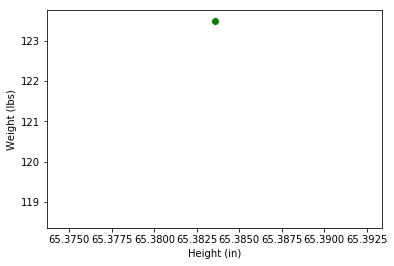

MSE= 107.168403327


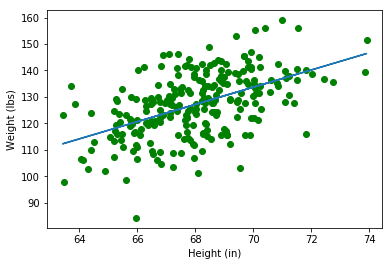

MSE= 184.650615142


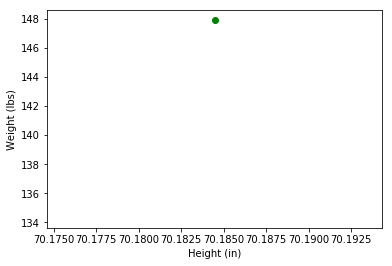

MSE= 106.15333392


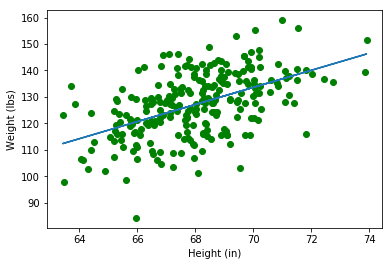

MSE= 439.22371997


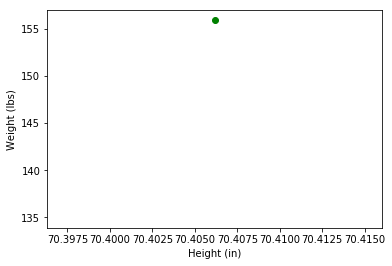

MSE= 107.778612428


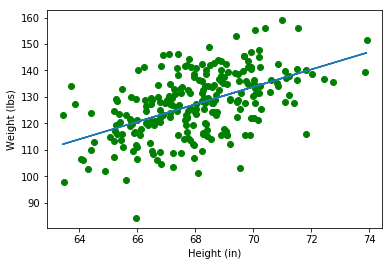

MSE= 31.8173052972


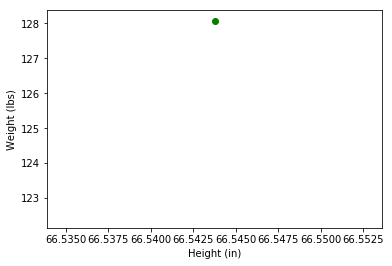

MSE= 107.880530092


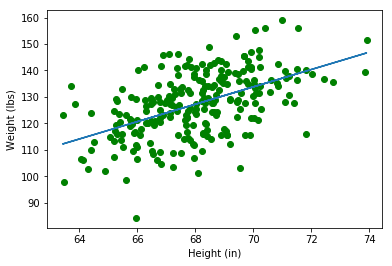

MSE= 6.38448336994


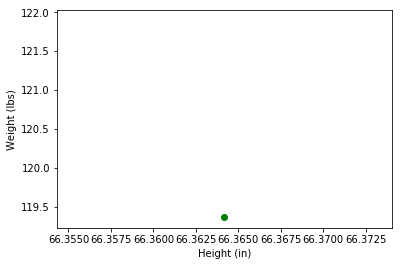

MSE= 107.641545131


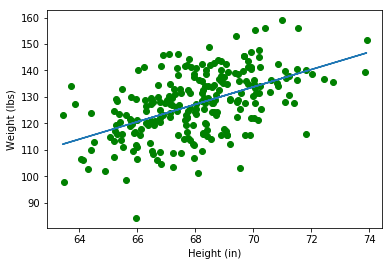

MSE= 65.8885332042


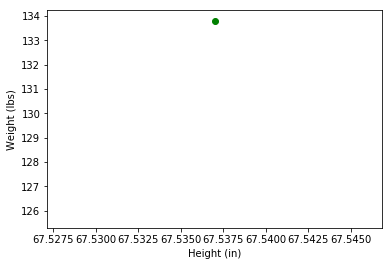

MSE= 107.740208913


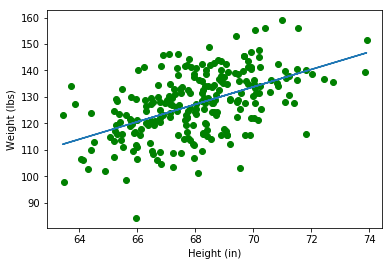

MSE= 41.4074134848


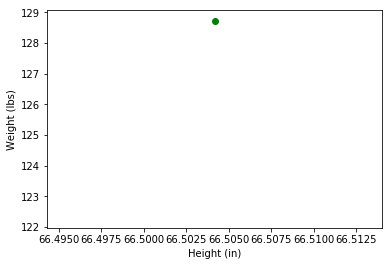

MSE= 107.707020264


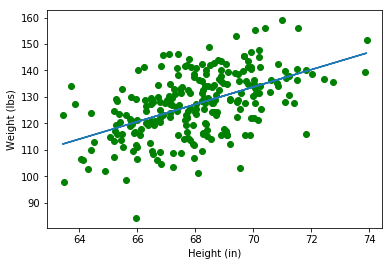

MSE= 49.623942216


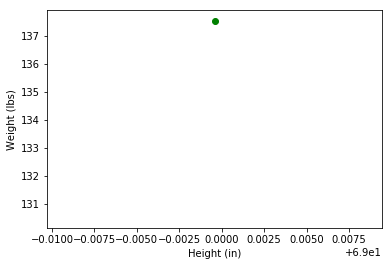

MSE= 107.896862301


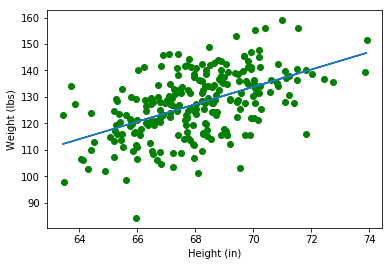

MSE= 2.29924082056


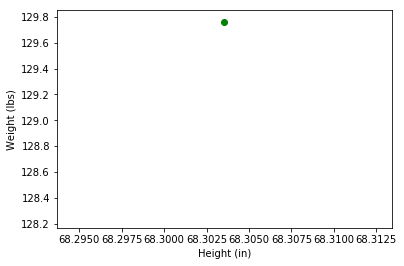

MSE= 107.81214331


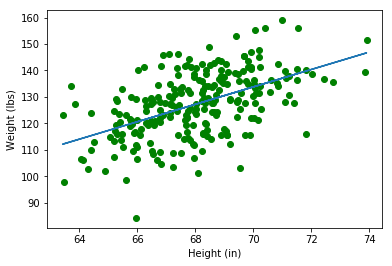

MSE= 23.4191232292


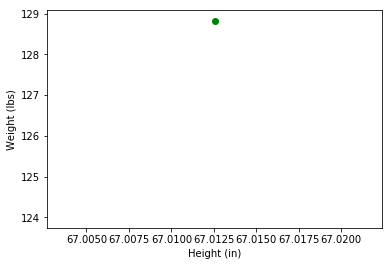

MSE= 107.900653823


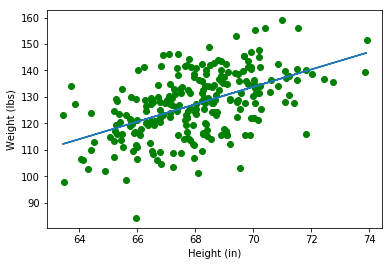

MSE= 1.3667120155


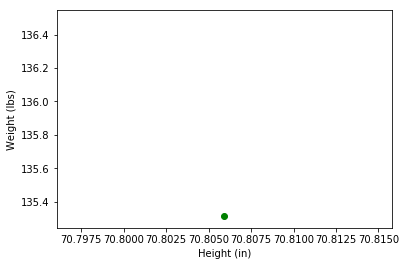

MSE= 106.540873958


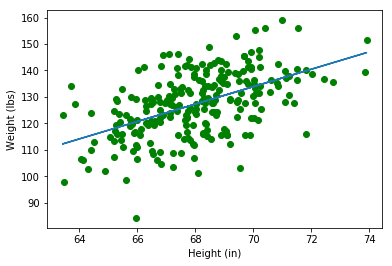

MSE= 339.95791917


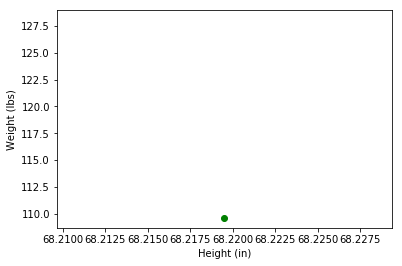

MSE= 107.34780173


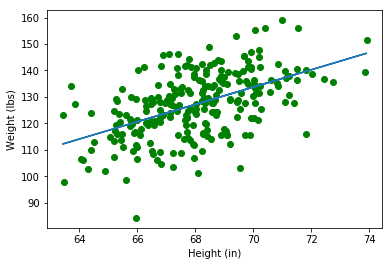

MSE= 139.185992454


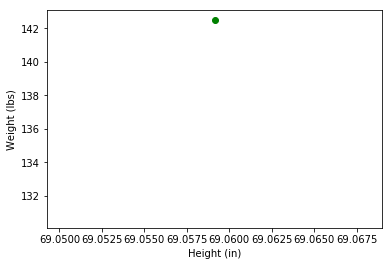

MSE= 107.741317414


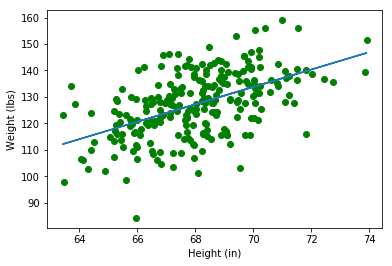

MSE= 41.0329638405


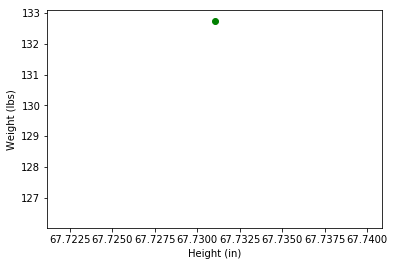

MSE= 106.094037139


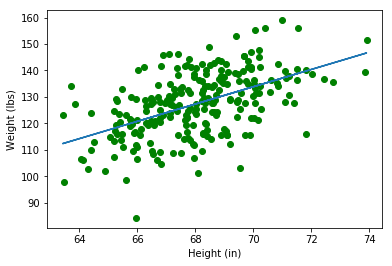

MSE= 451.507732719


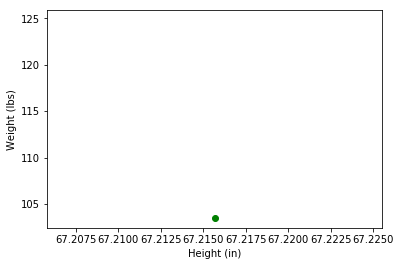

MSE= 107.905290195


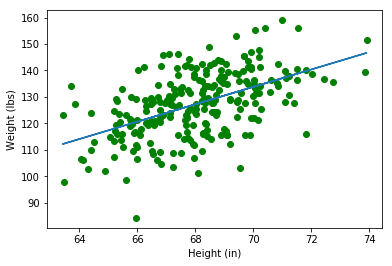

MSE= 0.2005525127


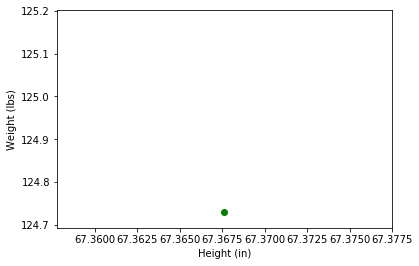

MSE= 107.409688901


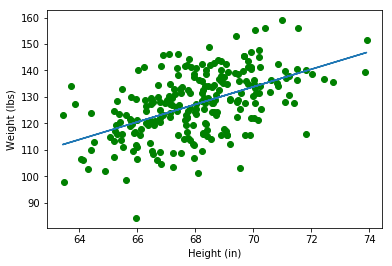

MSE= 124.624036093


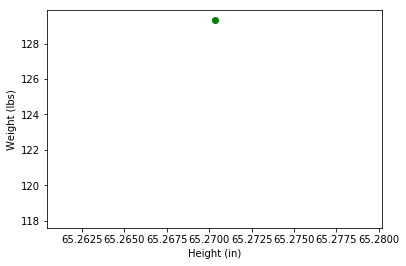

MSE= 107.87902359


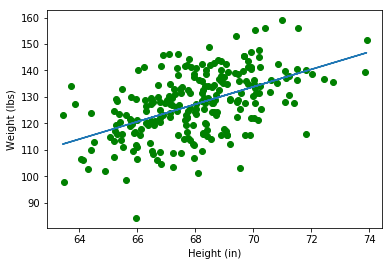

MSE= 6.80107339861


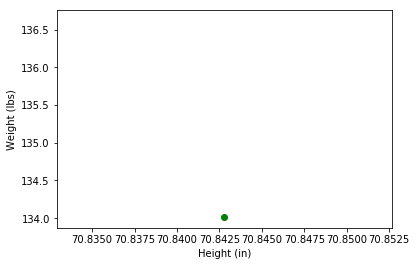

MSE= 107.716917655


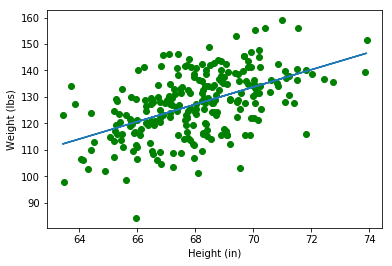

MSE= 47.2971009472


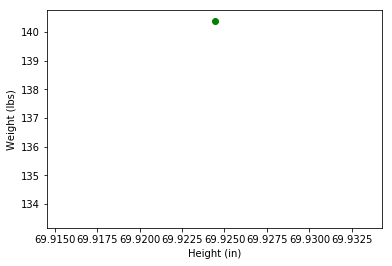

MSE= 107.292827317


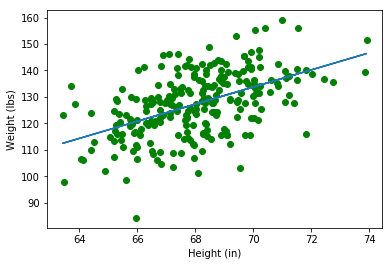

MSE= 155.051096333


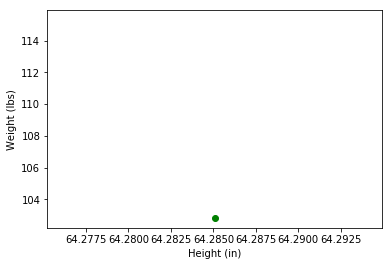

MSE= 107.905228207


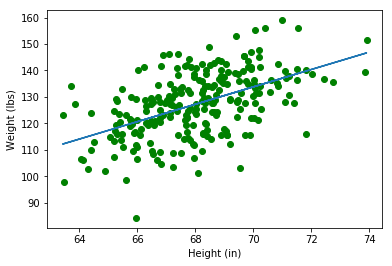

MSE= 0.215913375039


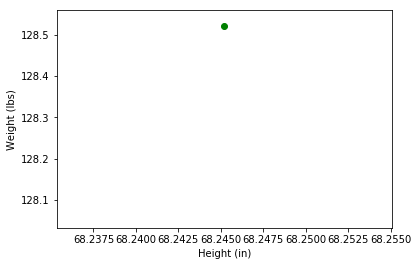

MSE= 107.896252888


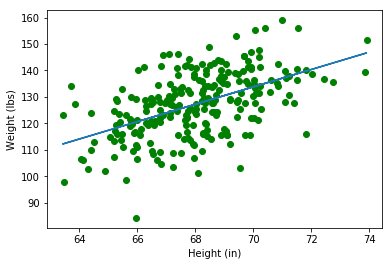

MSE= 2.45803642462


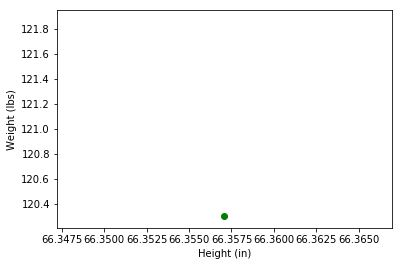

MSE= 107.488222875


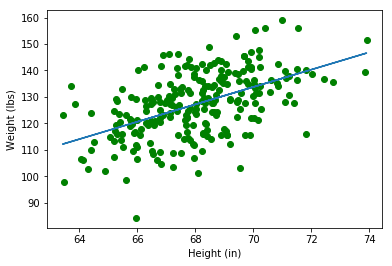

MSE= 104.065165155


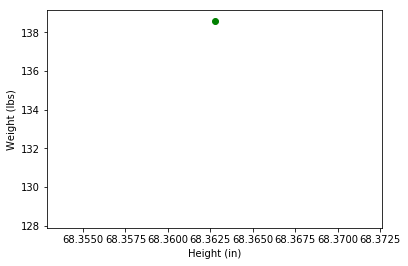

MSE= 107.107816662


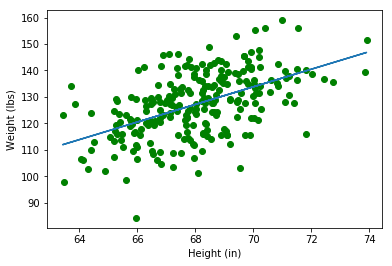

MSE= 200.169605533


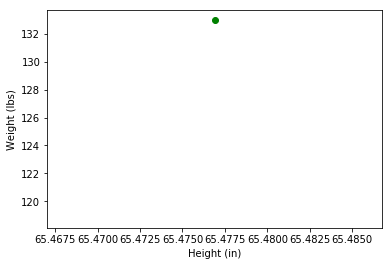

MSE= 106.693506072


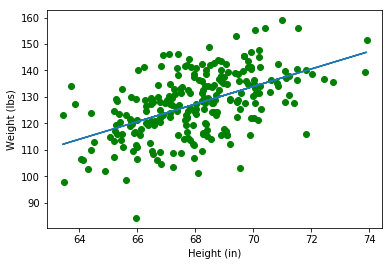

MSE= 302.915657775


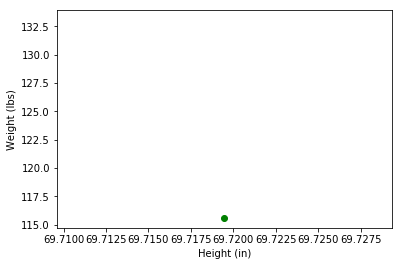

MSE= 107.846780478


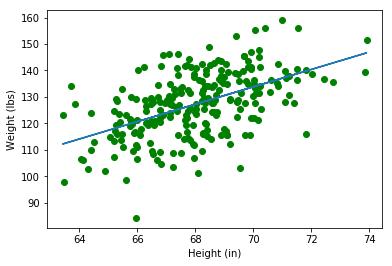

MSE= 14.7706119204


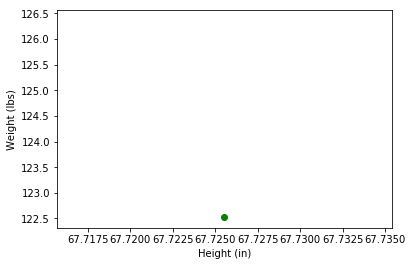

MSE= 107.793531056


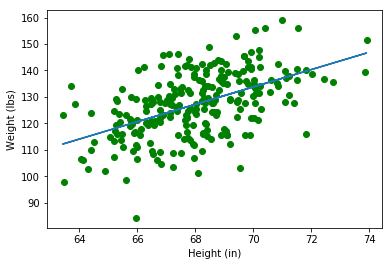

MSE= 28.041024336


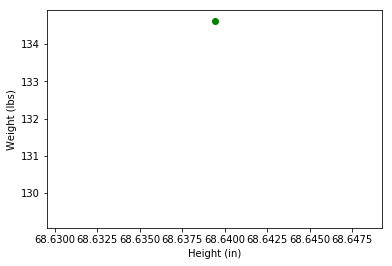

MSE= 107.898594692


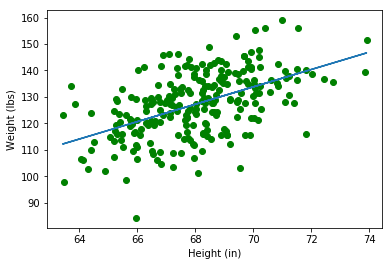

MSE= 1.87068192236


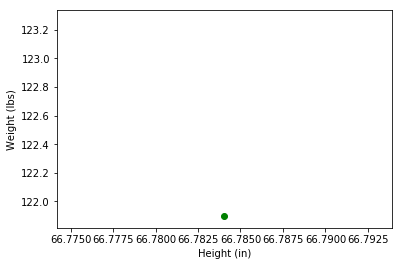

MSE= 106.046178936


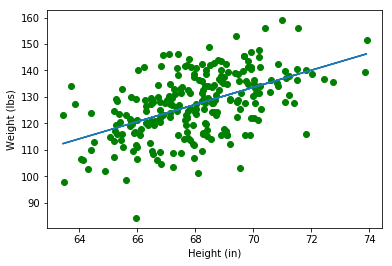

MSE= 465.264194793


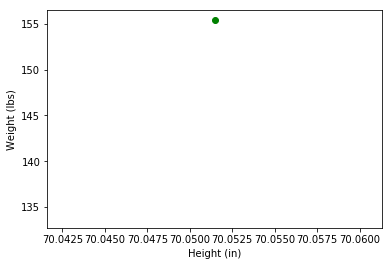

MSE= 107.68702747


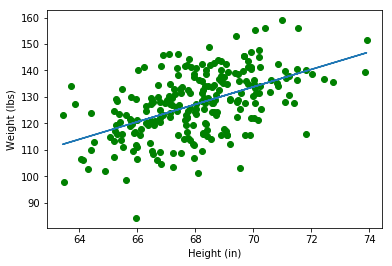

MSE= 54.7259064264


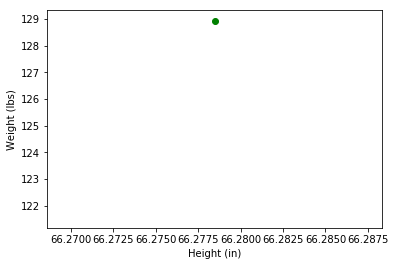

MSE= 107.888205551


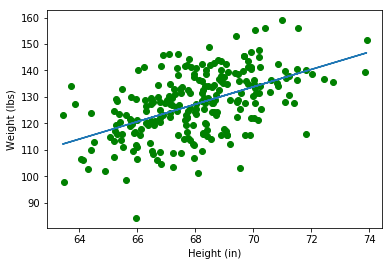

MSE= 4.46159748191


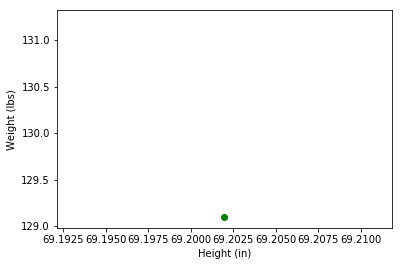

MSE= 107.613712899


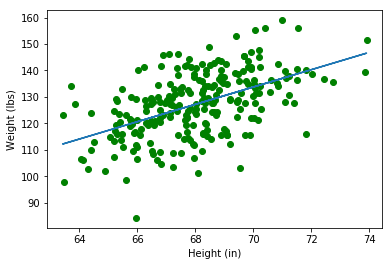

MSE= 72.9059903319


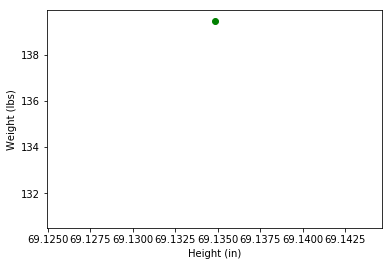

MSE= 106.904537168


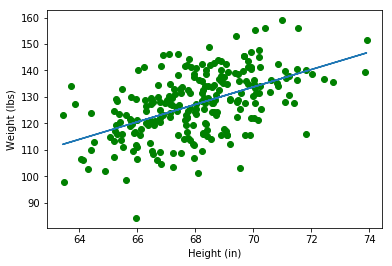

MSE= 249.498821779


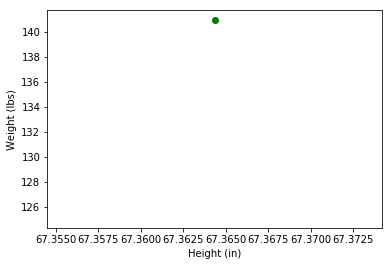

MSE= 107.879909389


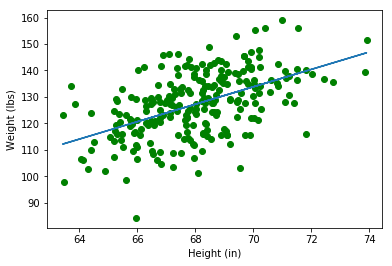

MSE= 6.55172564493


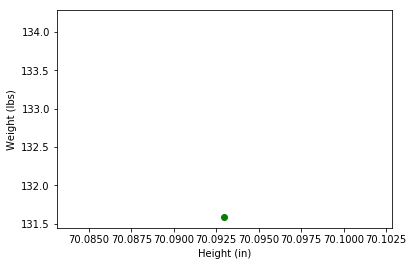

MSE= 107.188352884


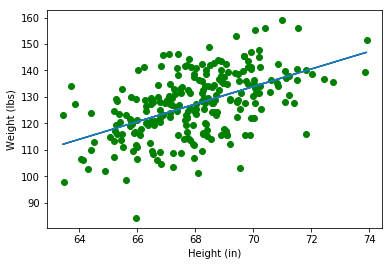

MSE= 179.650289905


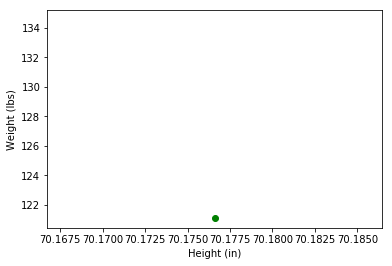

MSE= 107.855970001


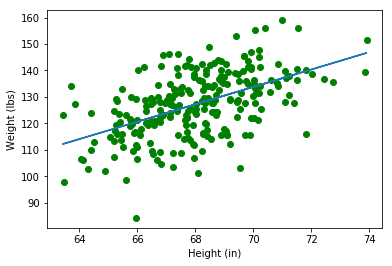

MSE= 12.481882823


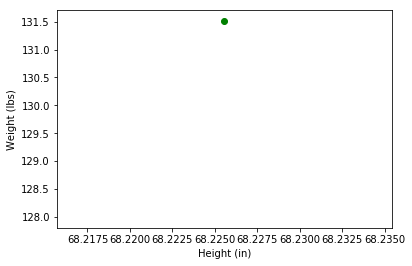

MSE= 107.58756872


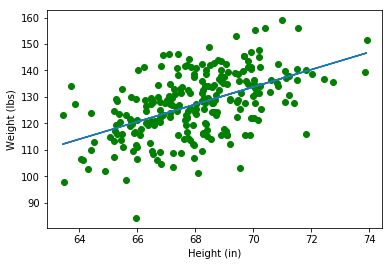

MSE= 79.3145452882


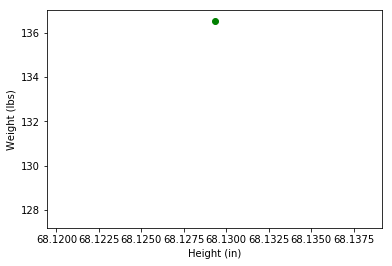

MSE= 107.713989213


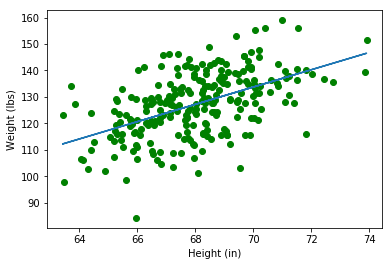

MSE= 48.0994229321


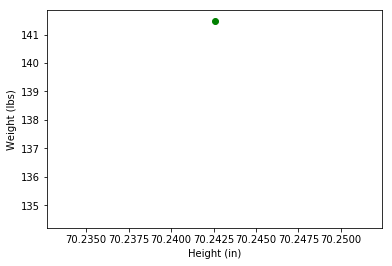

MSE= 107.891275527


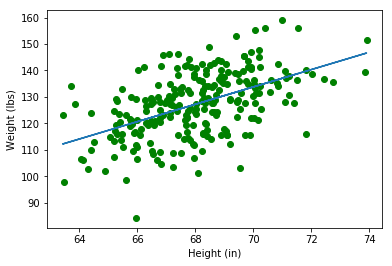

MSE= 3.73996720001


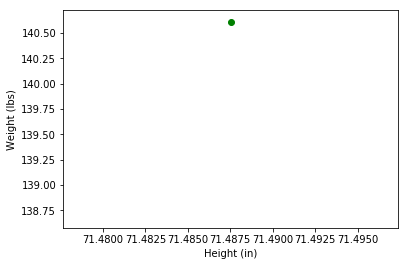

MSE= 106.431509557


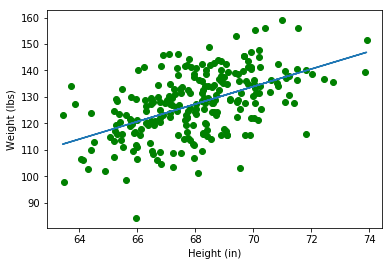

MSE= 367.756231243


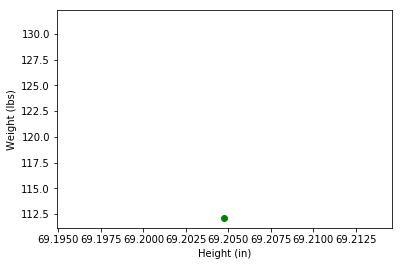

MSE= 107.90475764


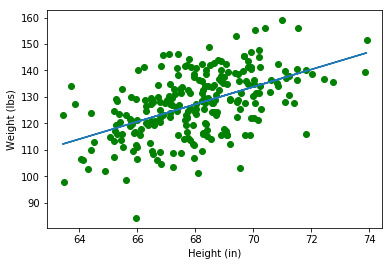

MSE= 0.334630537347


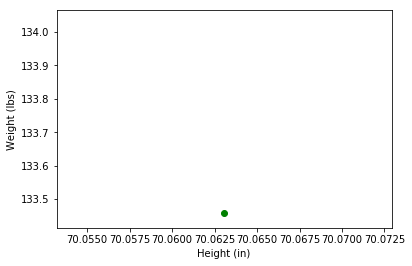

MSE= 107.845555789


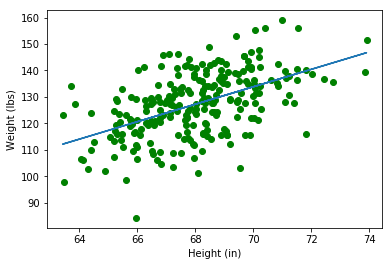

MSE= 15.1831026152


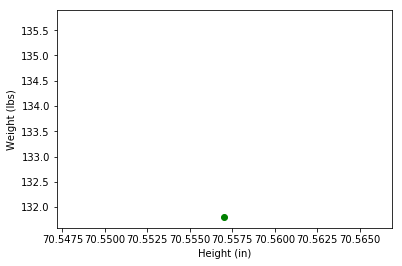

MSE= 107.895756856


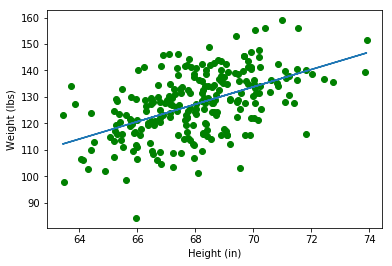

MSE= 2.5825896018


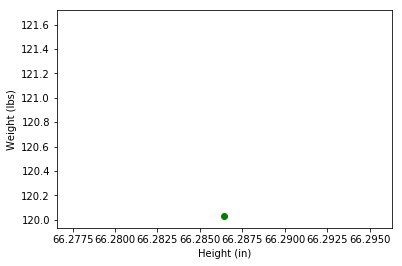

MSE= 107.41642391


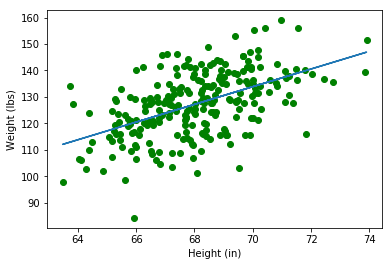

MSE= 124.792305413


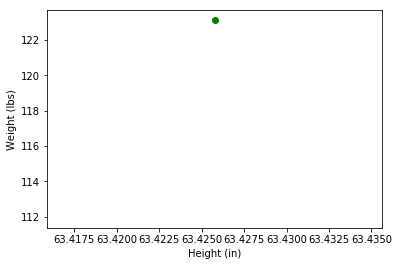

MSE= 107.807122665


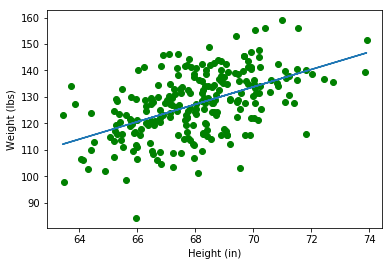

MSE= 24.6853817912


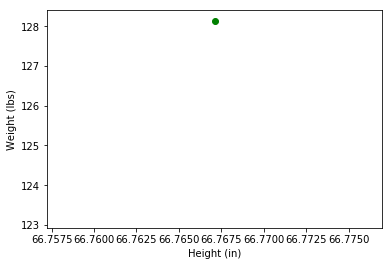

MSE= 107.03139608


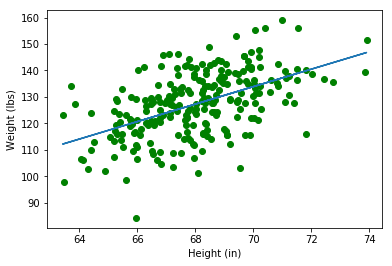

MSE= 217.987939936


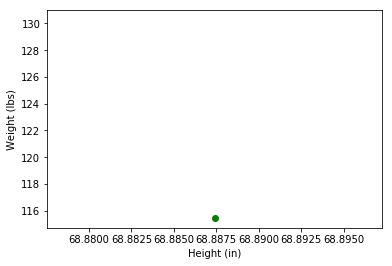

MSE= 106.998477507


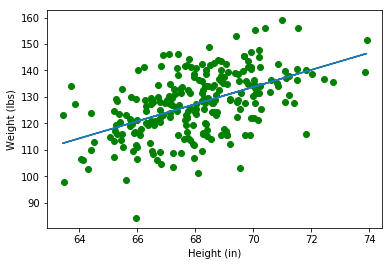

MSE= 228.445426211


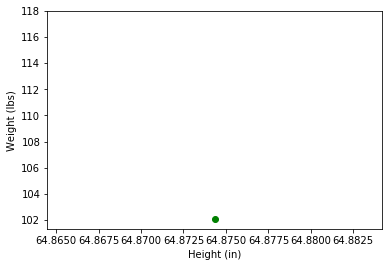

MSE= 107.756282581


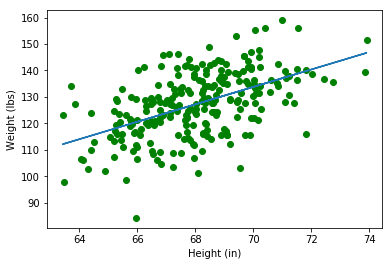

MSE= 37.3371271673


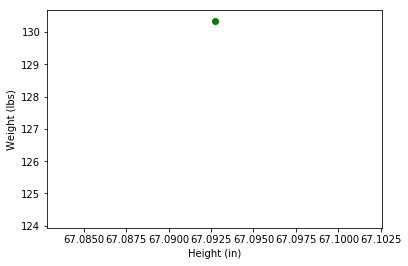

MSE= 107.770394695


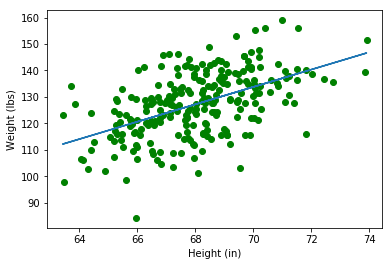

MSE= 33.7938971177


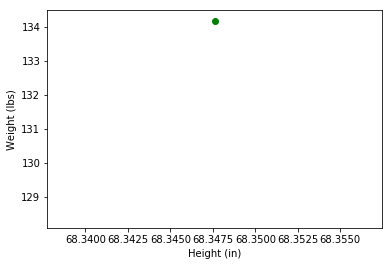

MSE= 106.149797037


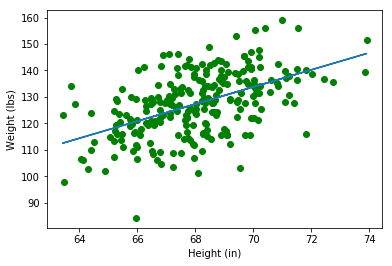

MSE= 440.074929575


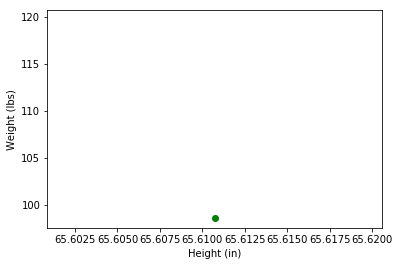

MSE= 107.333704666


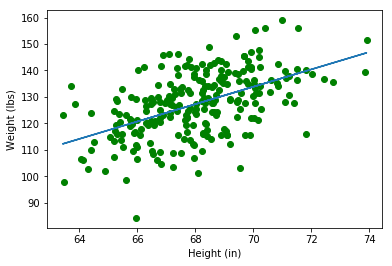

MSE= 142.534671735


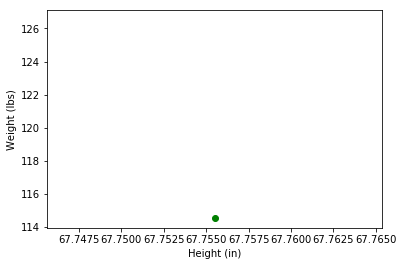

MSE= 107.846674712


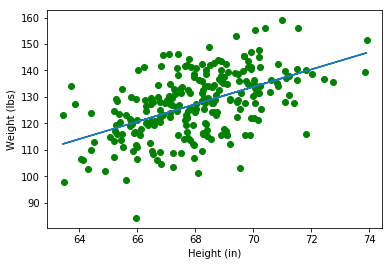

MSE= 14.7957261707


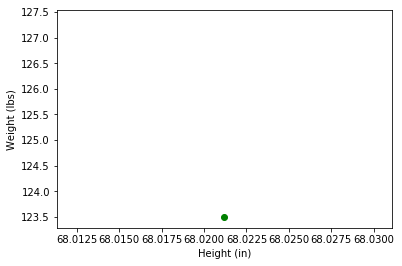

MSE= 107.867321121


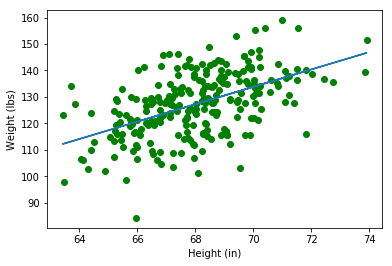

MSE= 9.65598034214


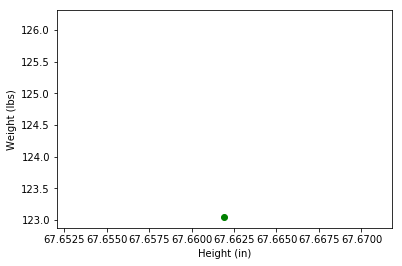

MSE= 107.814049261


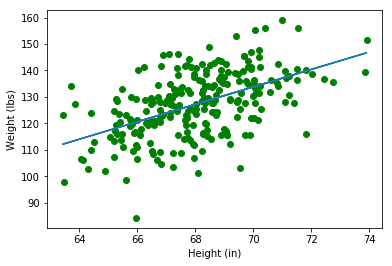

MSE= 22.9911441932


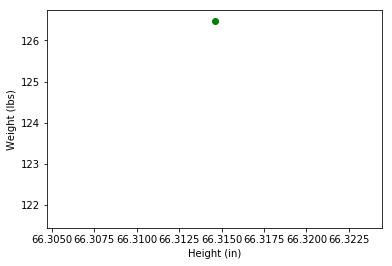

MSE= 107.854756393


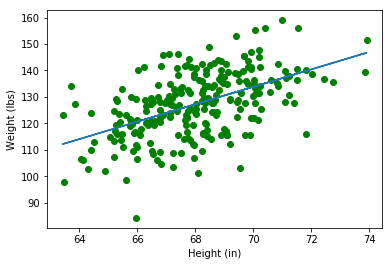

MSE= 12.8123542192


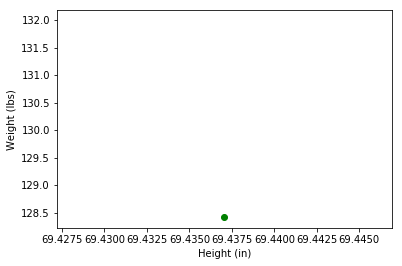

MSE= 107.140597352


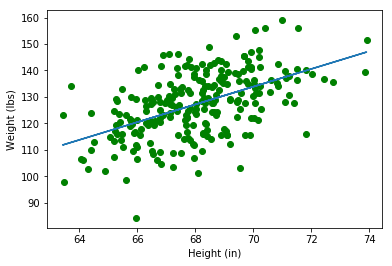

MSE= 194.304208771


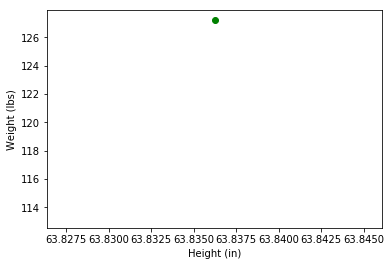

MSE= 107.831711495


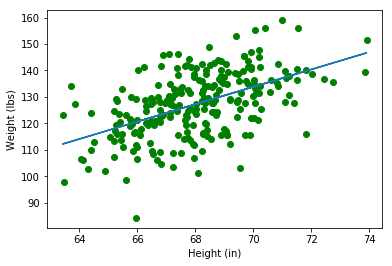

MSE= 18.5231319173


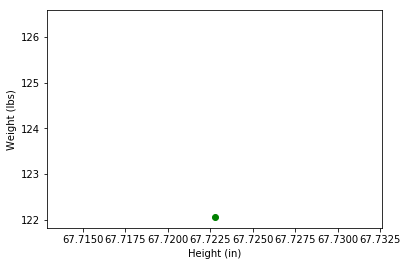

MSE= 107.74031254


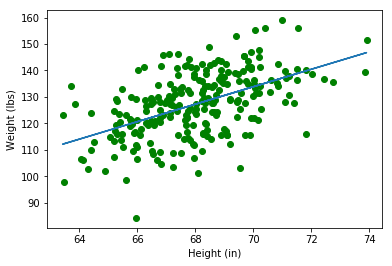

MSE= 41.4710110967


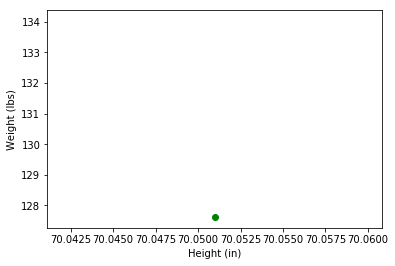

MSE= 107.8743677


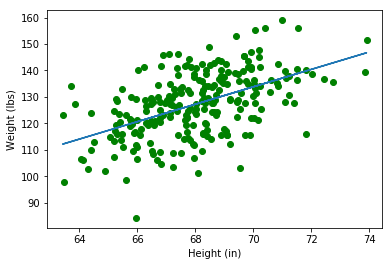

MSE= 7.94174237746


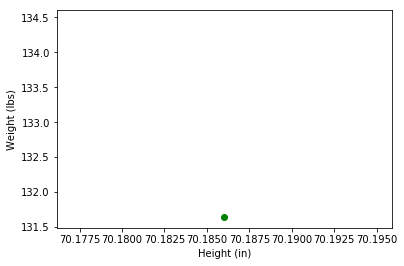

MSE= 107.604597706


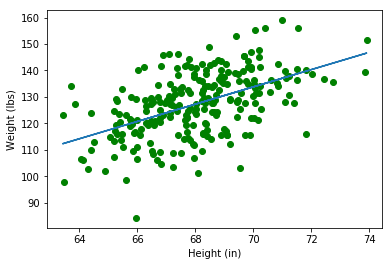

MSE= 75.4221402126


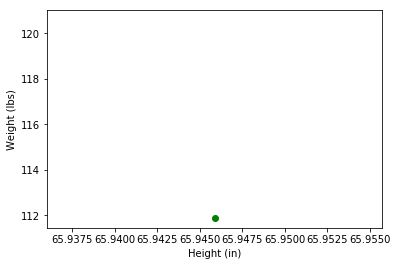

MSE= 107.339180371


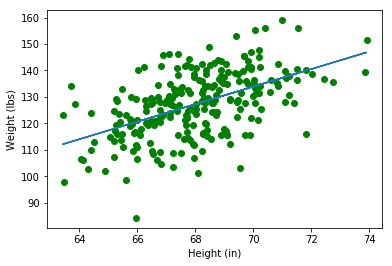

MSE= 141.787460591


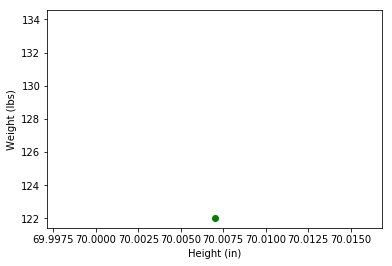

MSE= 107.904073261


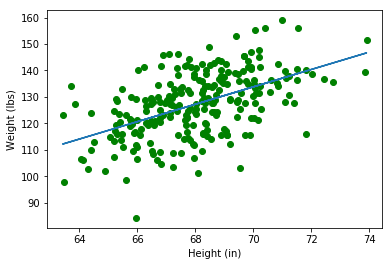

MSE= 0.503686528514


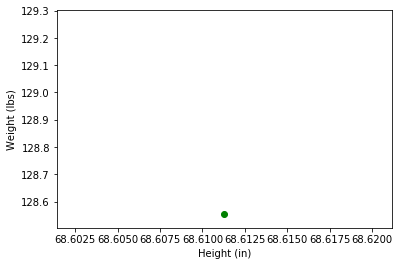

MSE= 107.874983109


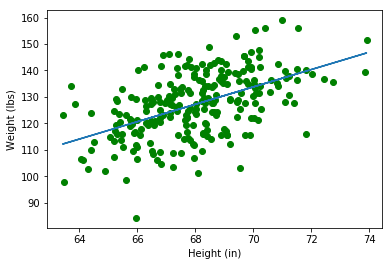

MSE= 7.75246785976


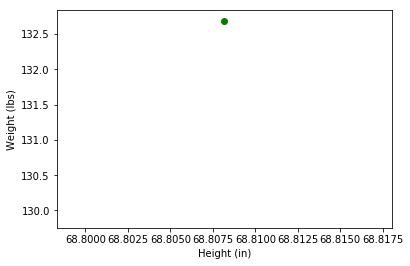

MSE= 107.869012


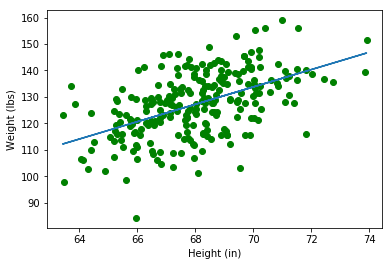

MSE= 9.26524921815


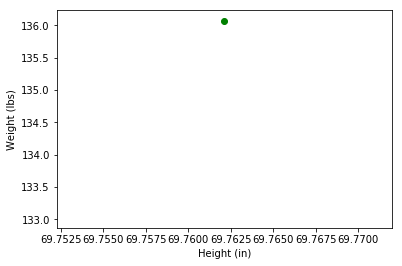

MSE= 107.870525298


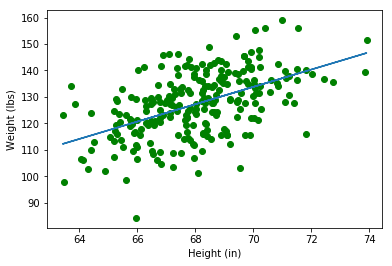

MSE= 8.92030244169


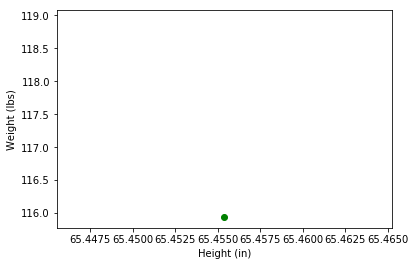

MSE= 107.710977978


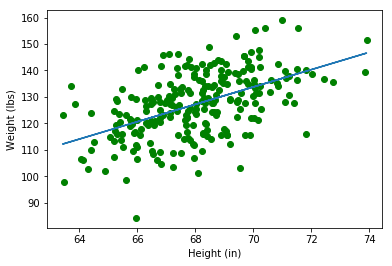

MSE= 48.6204402185


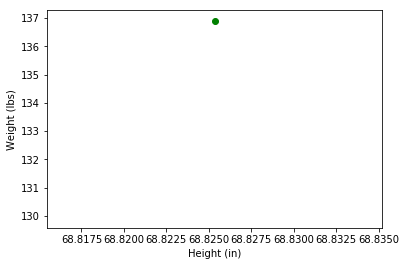

MSE= 107.906007897


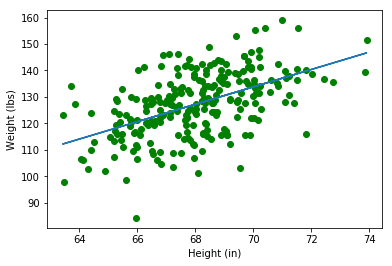

MSE= 0.0218726117371


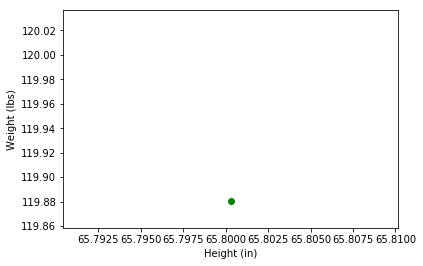

MSE= 106.911568759


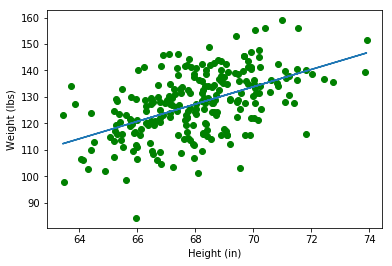

MSE= 247.805040666


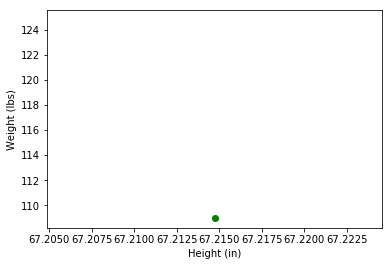

MSE= 107.852094473


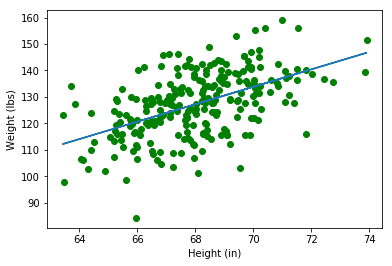

MSE= 13.4759658691


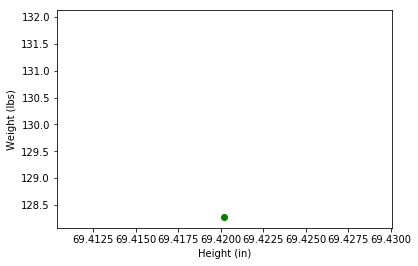

MSE= 107.807313332


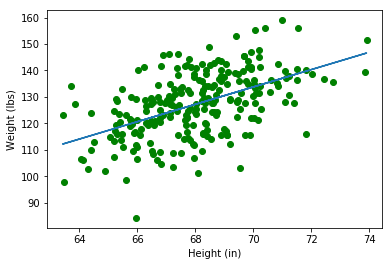

MSE= 24.6207100133


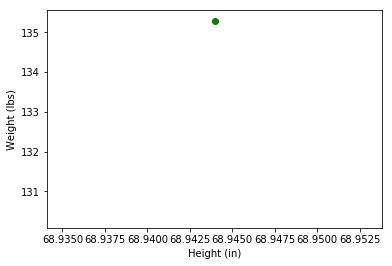

MSE= 106.253289467


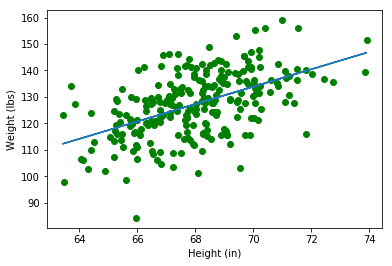

MSE= 411.550238559


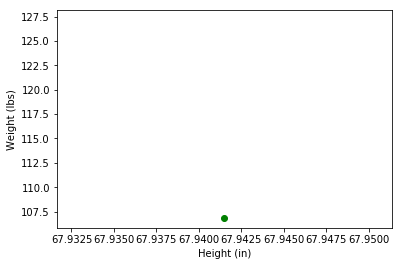

MSE= 107.845942388


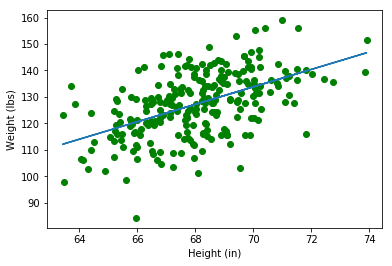

MSE= 15.0713481094


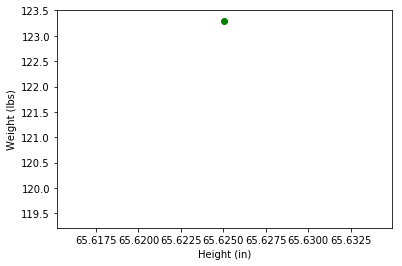

MSE= 107.241313369


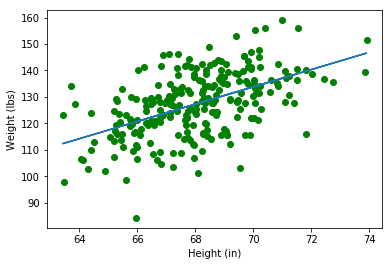

MSE= 165.942741107


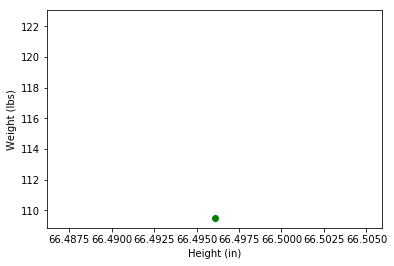

MSE= 107.665545954


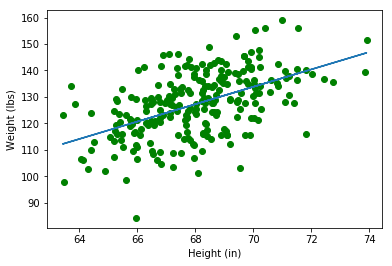

MSE= 59.8971288385


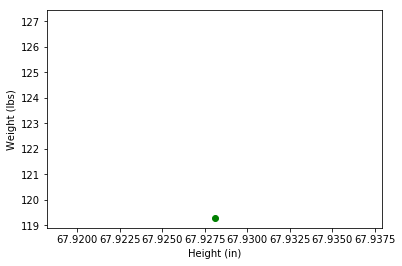

MSE= 107.496850495


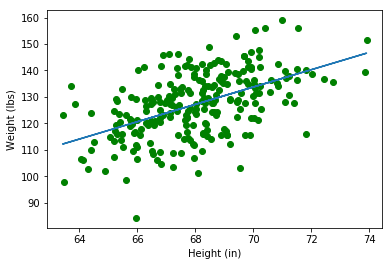

MSE= 101.991175765


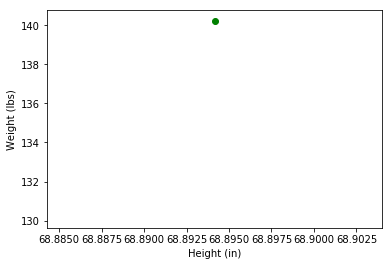

MSE= 107.904474845


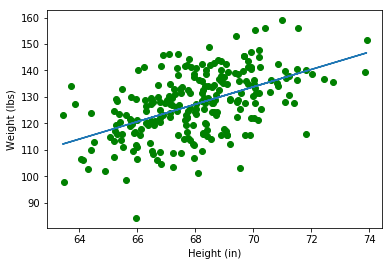

MSE= 0.405718658362


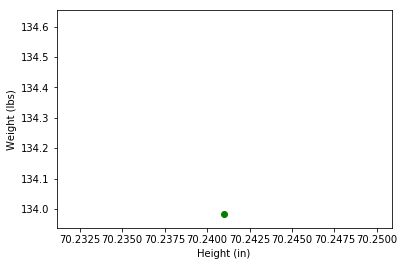

MSE= 107.825810797


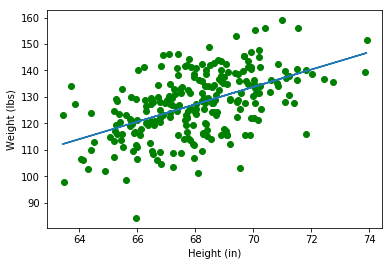

MSE= 19.9923774532


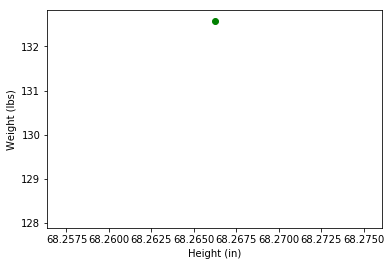

MSE= 107.695529339


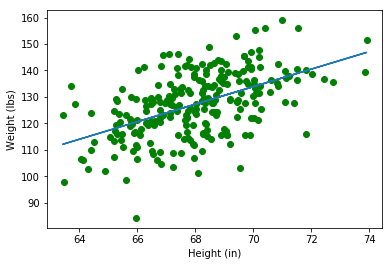

MSE= 53.0378895577


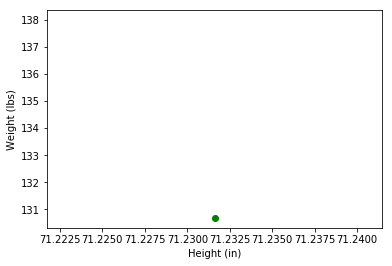

MSE= 106.957782315


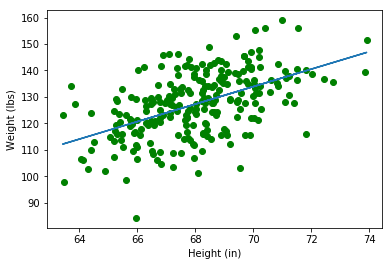

MSE= 236.441657013


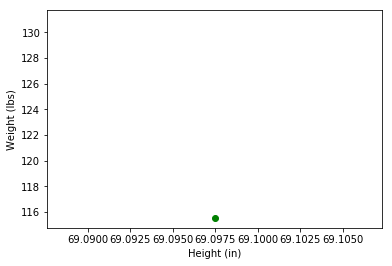

MSE= 107.617863594


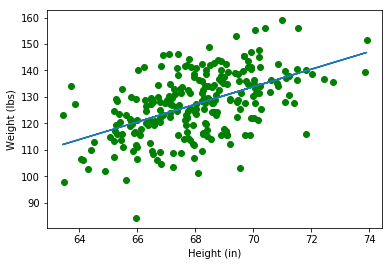

MSE= 72.8065904099


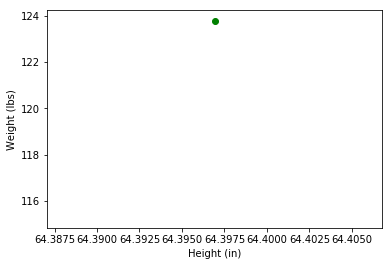

MSE= 107.553699519


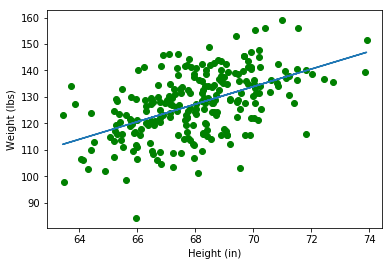

MSE= 88.6778982206


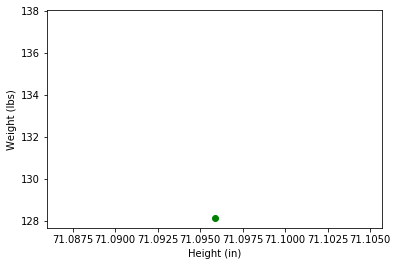

MSE= 107.647424203


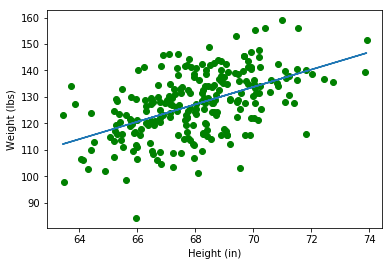

MSE= 64.4124455882


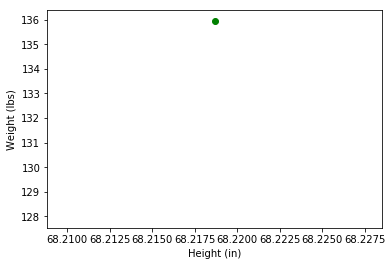

MSE= 107.847858578


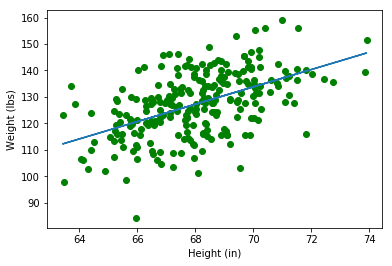

MSE= 14.5702983011


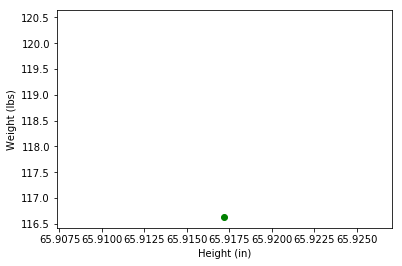

MSE= 107.897919724


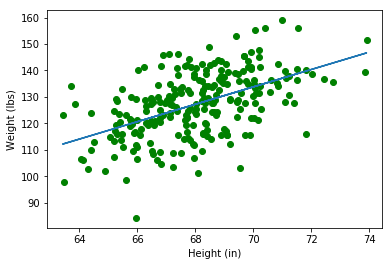

MSE= 2.03642191496


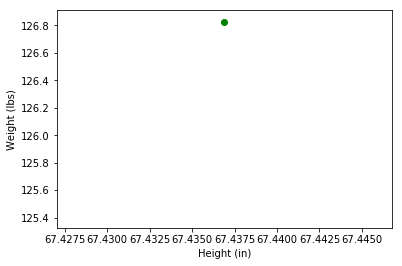

MSE= 107.811020289


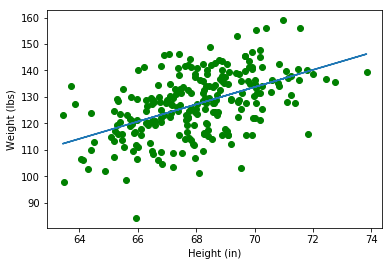

MSE= 24.6131680136


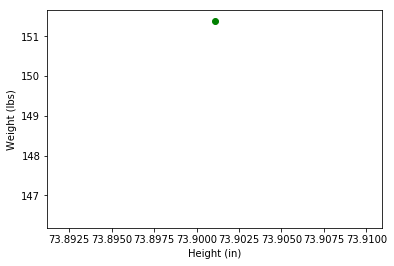

MSE= 107.860183541


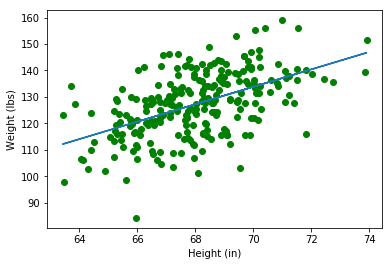

MSE= 11.4814044491


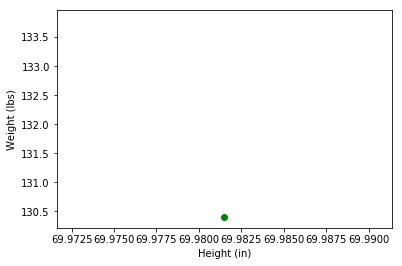

MSE= 107.842290632


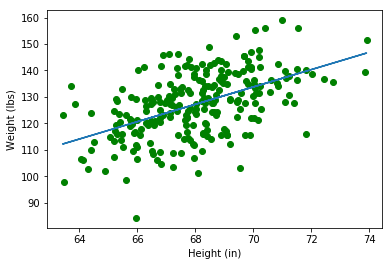

MSE= 15.9275836696


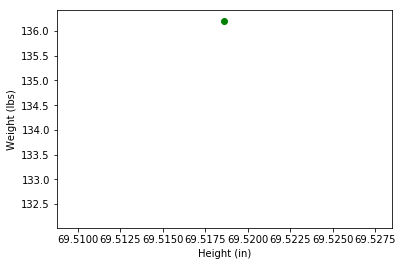

MSE= 107.819502794


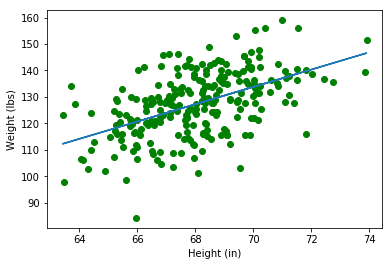

MSE= 21.7507205328


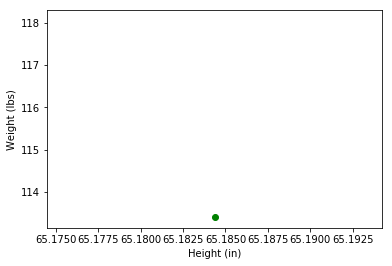

MSE= 107.890653772


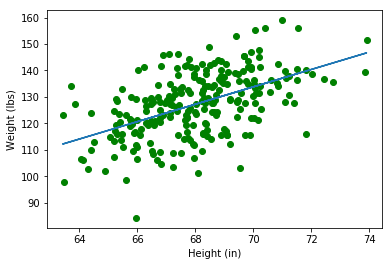

MSE= 3.84493378948


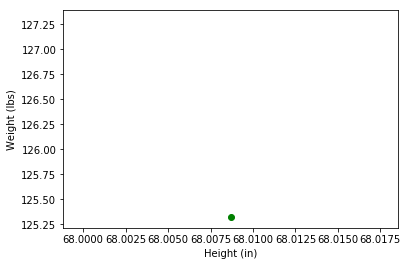

MSE= 107.903630572


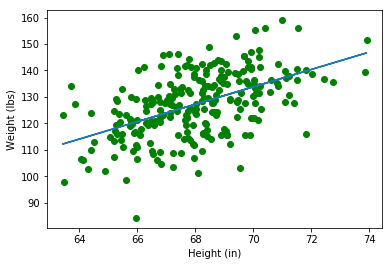

MSE= 0.61378717821


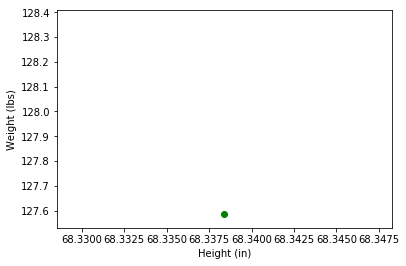

MSE= 107.425623396


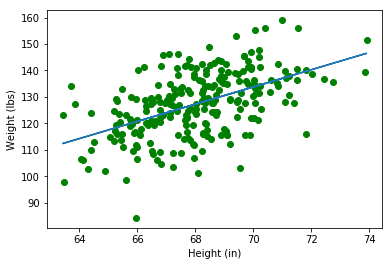

MSE= 120.687418495


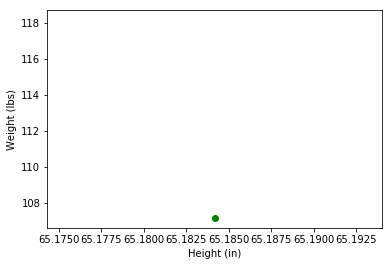

MSE= 107.356077618


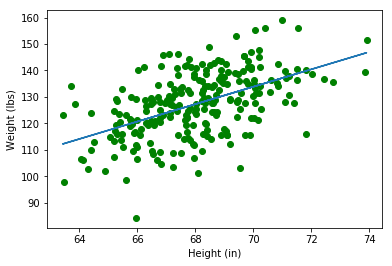

MSE= 136.964639451


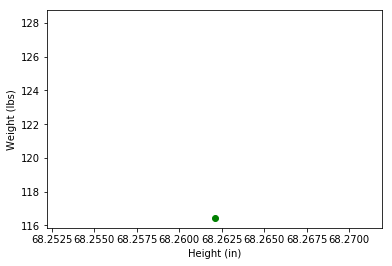

MSE= 107.815906883


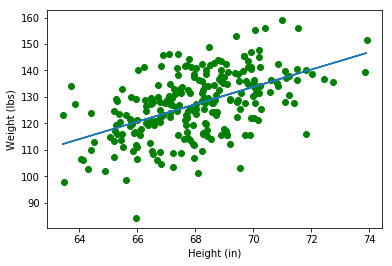

MSE= 22.4648483421


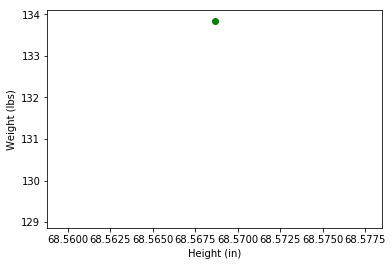

MSE= 107.872656117


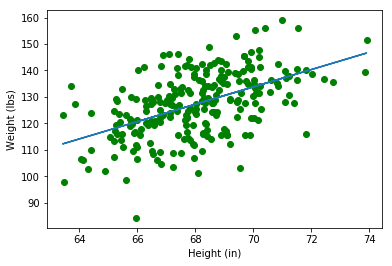

MSE= 8.43998617633


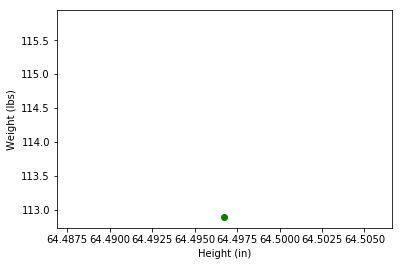

MSE= 107.900554764


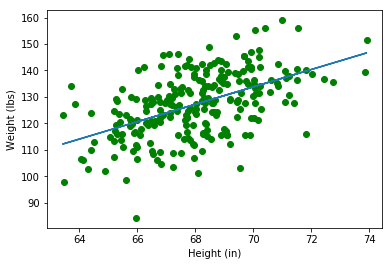

MSE= 1.38034877981


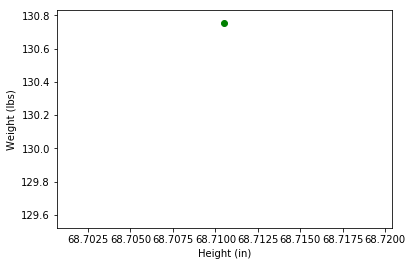

MSE= 107.673563234


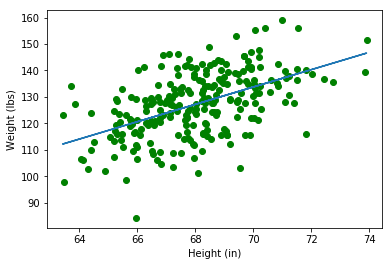

MSE= 57.9508742771


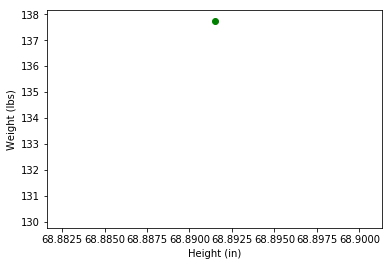

MSE= 107.712343053


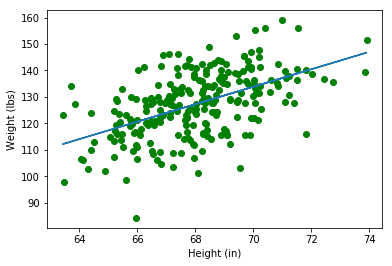

MSE= 48.3699508727


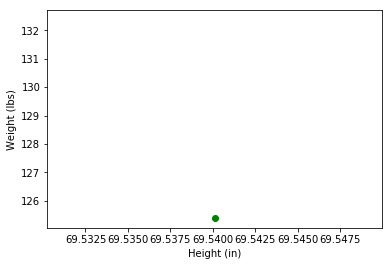

MSE= 107.202003966


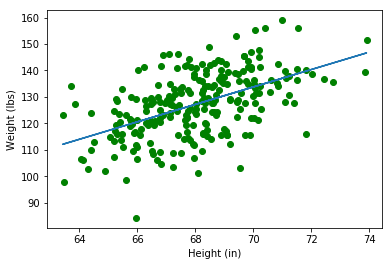

MSE= 175.388261402


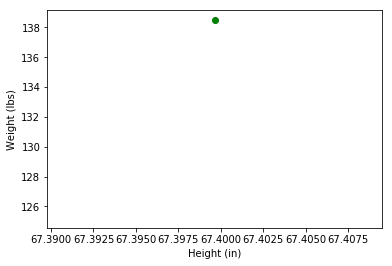

MSE= 107.897845612


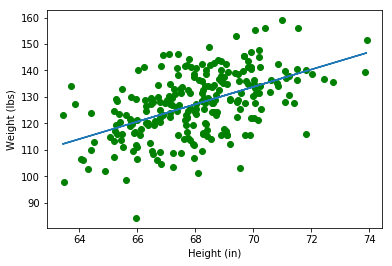

MSE= 2.05942241567


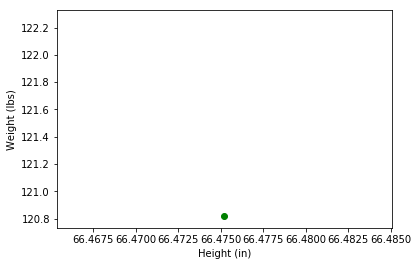

MSE= 106.370868805


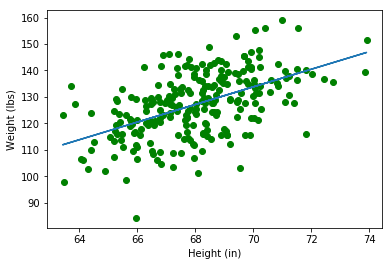

MSE= 383.936388519


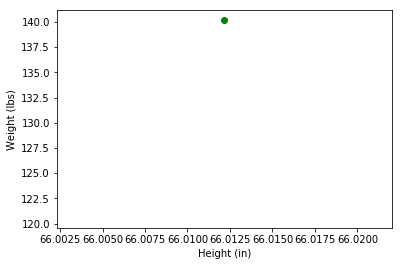

MSE= 107.79789354


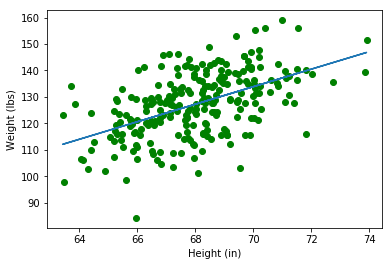

MSE= 27.538393889


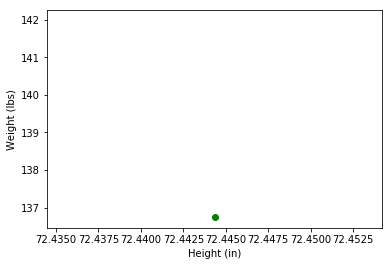

MSE= 107.614670255


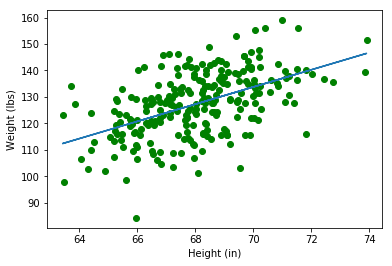

MSE= 73.7792314049


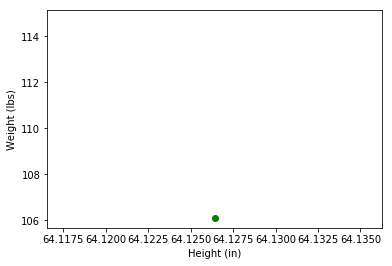

MSE= 105.943530516


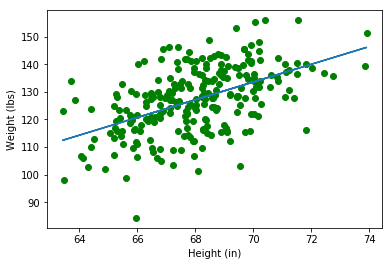

MSE= 493.484385241


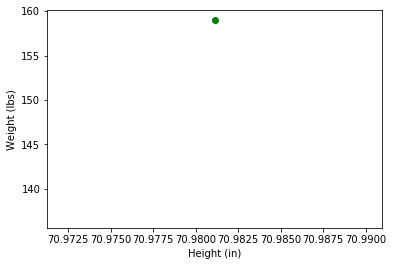

MSE= 106.759335323


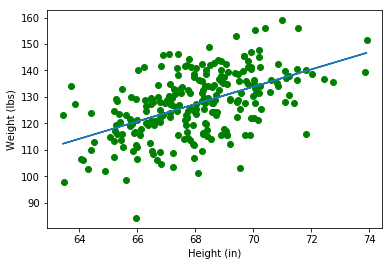

MSE= 285.621418996


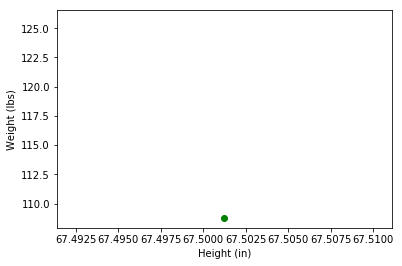

MSE= 107.894636323


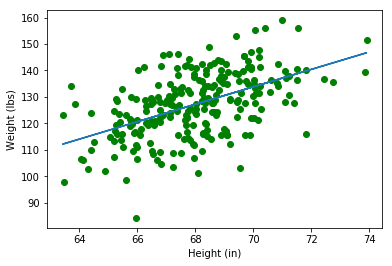

MSE= 2.9045977997


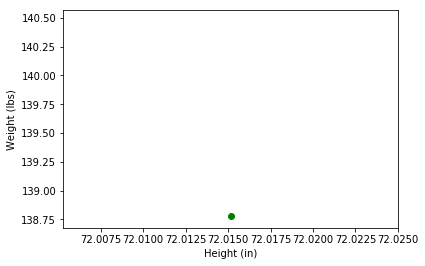

MSE= 107.880439836


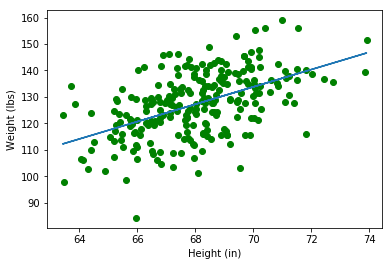

MSE= 6.43927418609


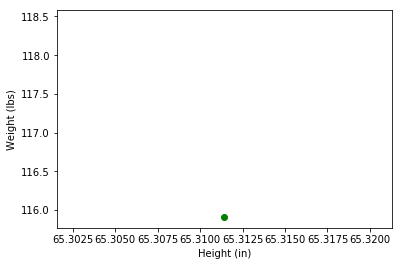

MSE= 105.930929763


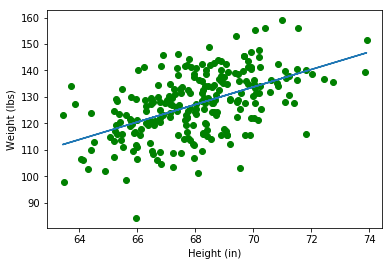

MSE= 492.278878192


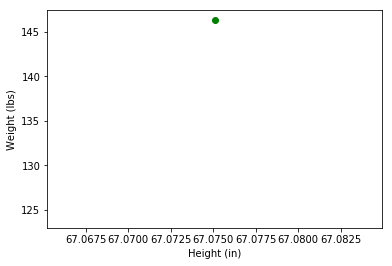

MSE= 107.780842445


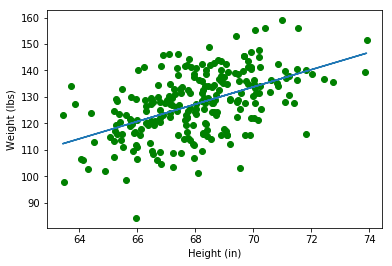

MSE= 31.6399230202


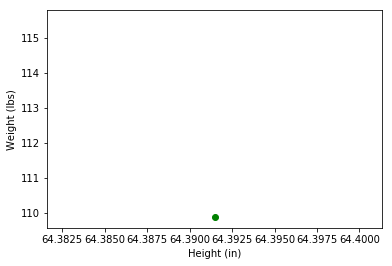

MSE= 107.69013628


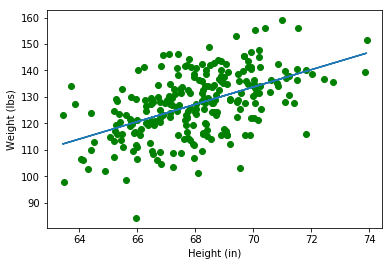

MSE= 53.8845382801


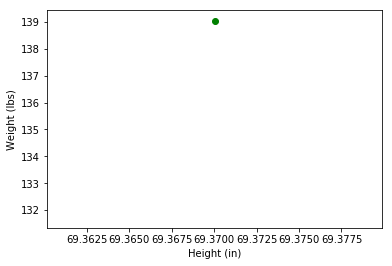

MSE= 107.606705863


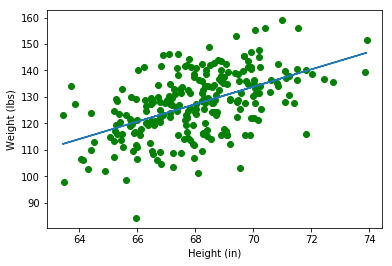

MSE= 74.5596632145


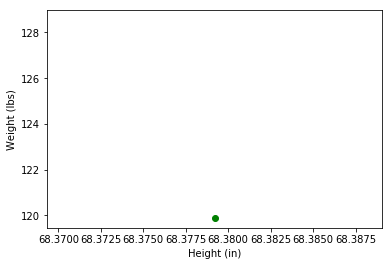

MSE= 107.506926907


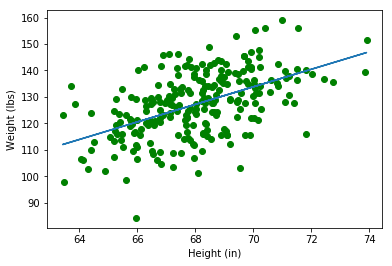

MSE= 100.18827096


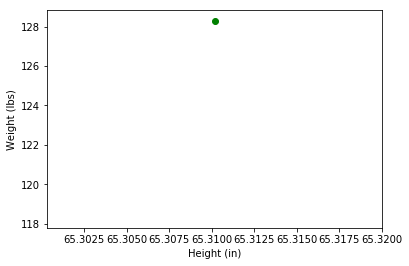

MSE= 107.873758366


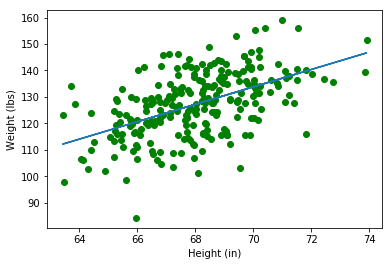

MSE= 8.05848756648


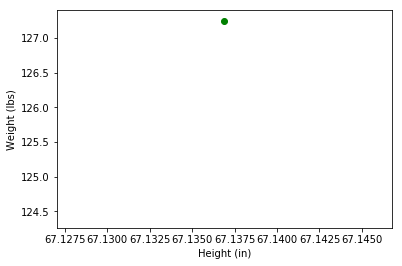

MSE= 107.18777402


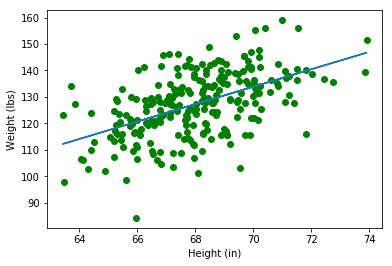

MSE= 178.892403894


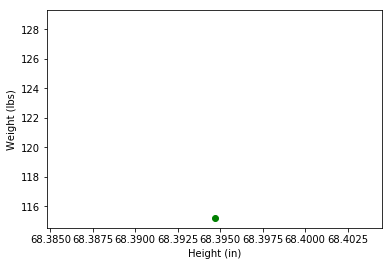

MSE= 107.865642113


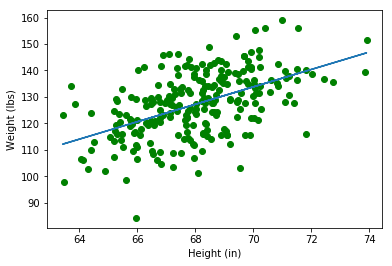

MSE= 10.1052020074


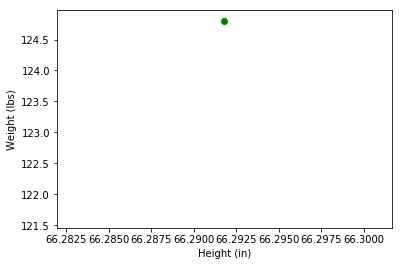

MSE= 107.883337392


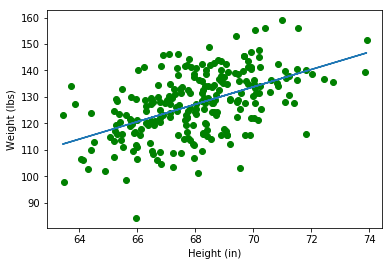

MSE= 5.67083552318


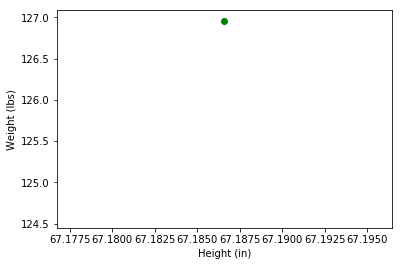

MSE= 107.547990296


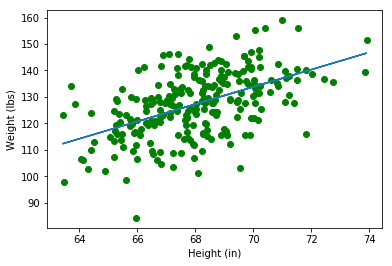

MSE= 89.5646425243


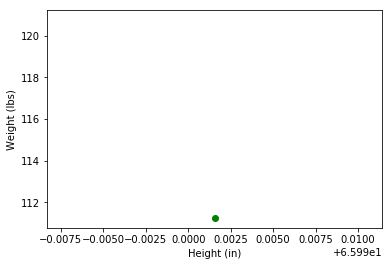

MSE= 107.550999592


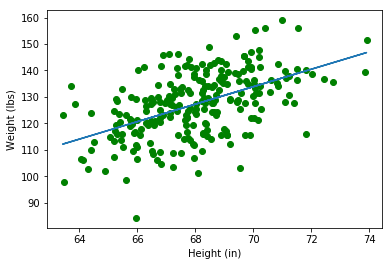

MSE= 88.6183576079


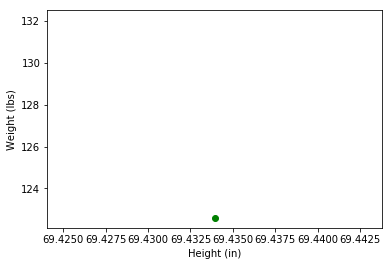

MSE= 107.870590552


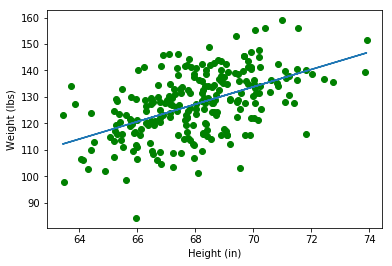

MSE= 8.8406820025


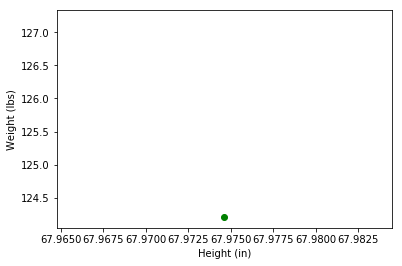

MSE= 107.892628418


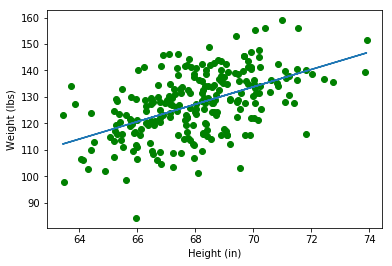

MSE= 3.35345778549


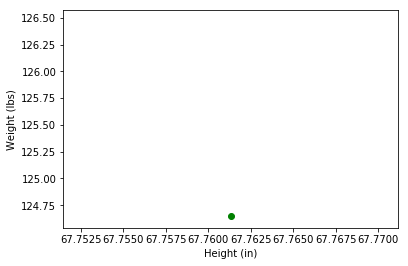

MSE= 107.900181528


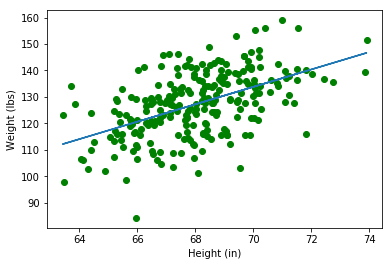

MSE= 1.48458480488


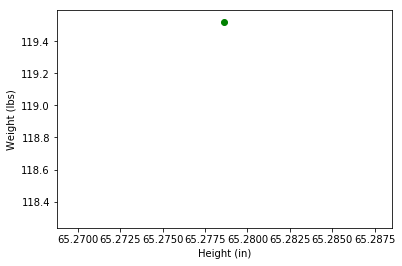

MSE= 107.69297424


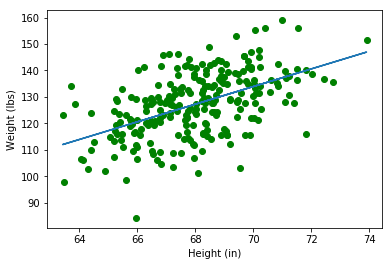

MSE= 55.1233892669


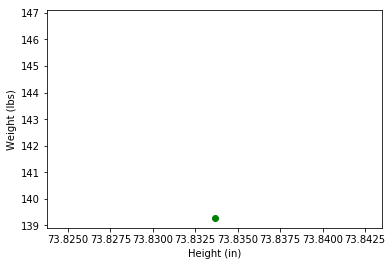

MSE= 106.514196382


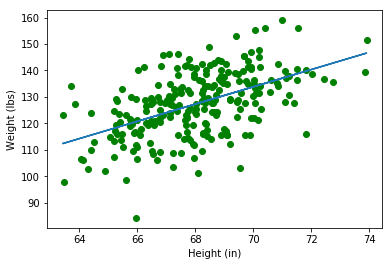

MSE= 347.119803684


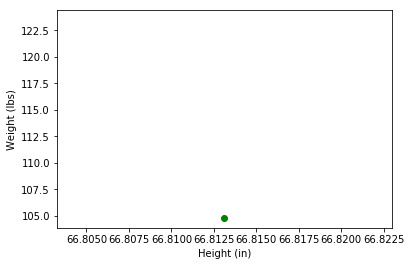

MSE= 107.904741935


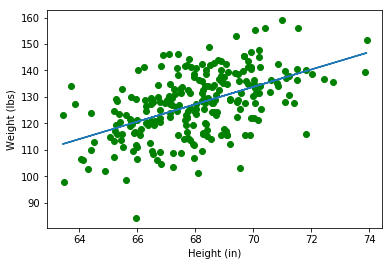

MSE= 0.337434268128


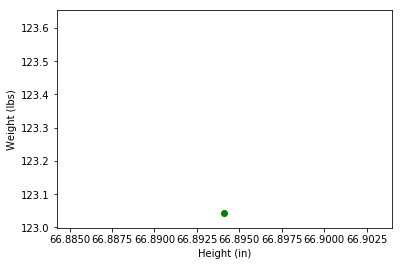

MSE= 107.902631701


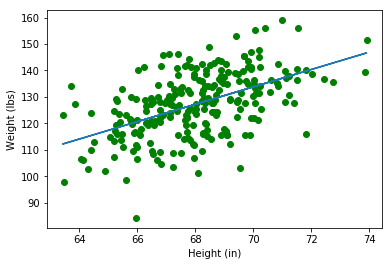

MSE= 0.867308813869


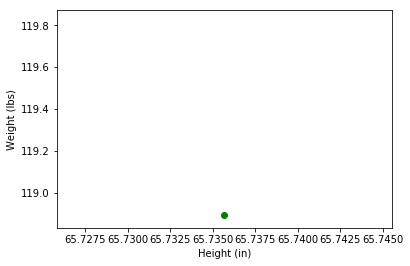

MSE= 107.903035893


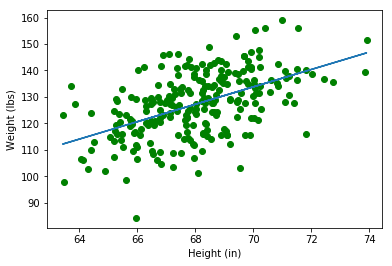

MSE= 0.765202624738


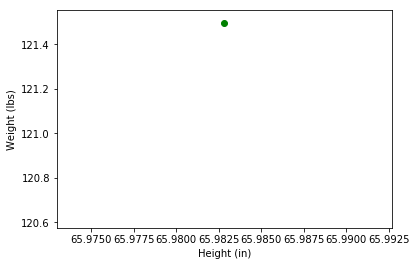

MSE= 107.860492269


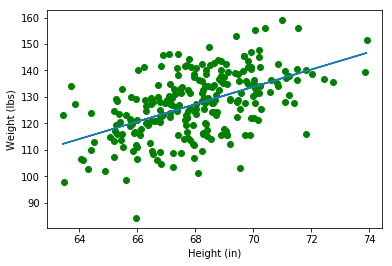

MSE= 11.3802025889


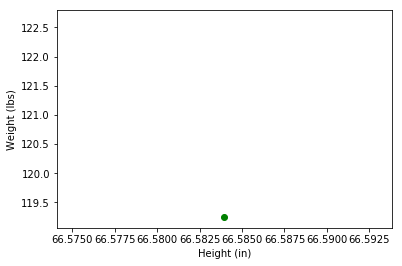

MSE= 107.443492827


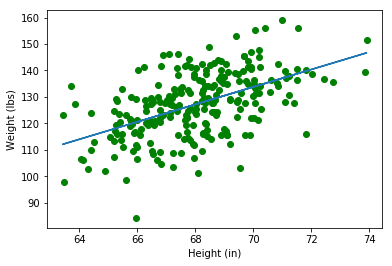

MSE= 115.287683301


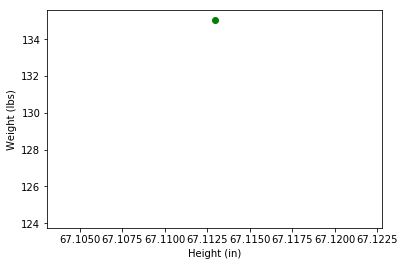

MSE= 107.839566493


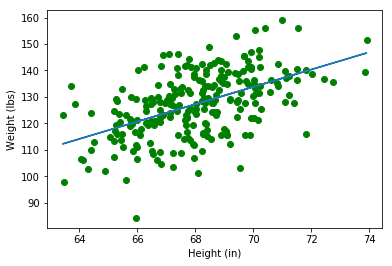

MSE= 16.6481803932


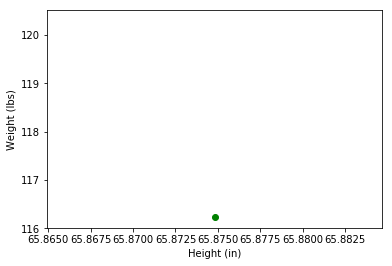

MSE= 107.102815825


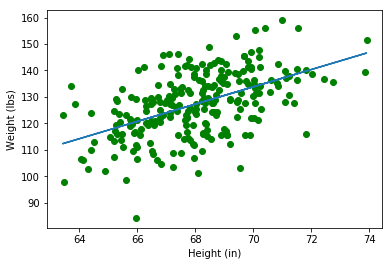

MSE= 200.343674762


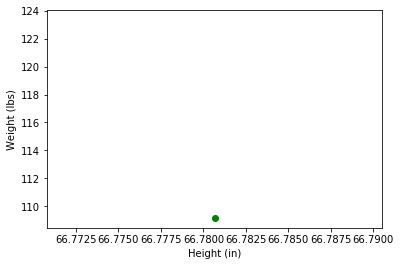

MSE= 107.785927545


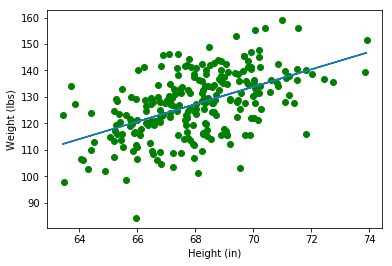

MSE= 29.9394933924


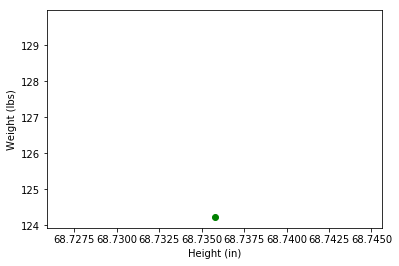

MSE= 106.323544049


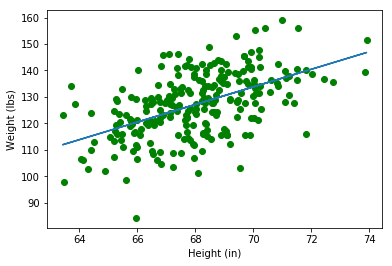

MSE= 395.420116233


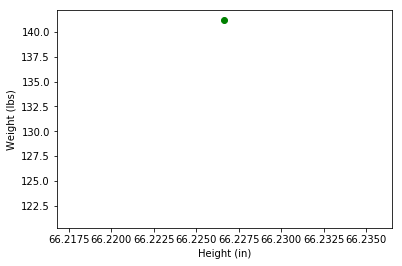

MSE= 107.605320349


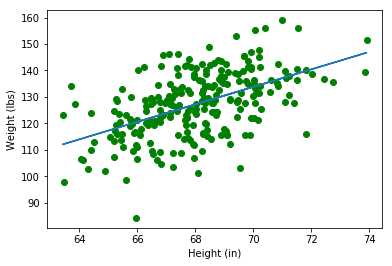

MSE= 75.2366825622


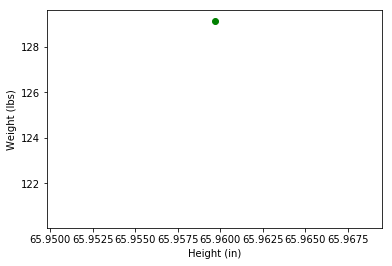

MSE= 107.899235981


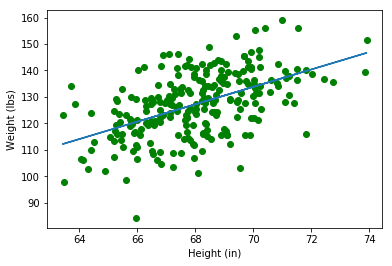

MSE= 1.70860003217


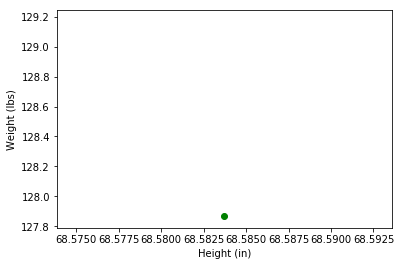

MSE= 107.894256866


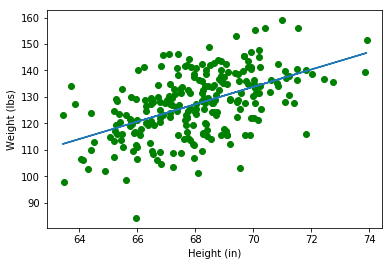

MSE= 2.95417879423


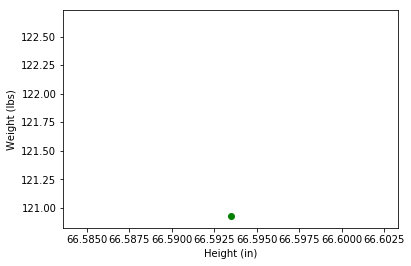

MSE= 107.847839506


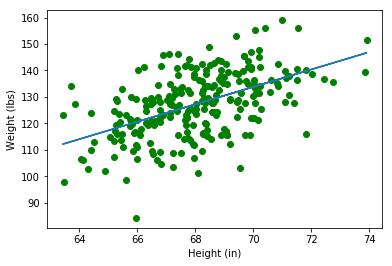

MSE= 14.5227508421


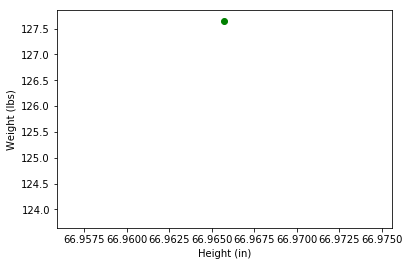

MSE= 105.159348309


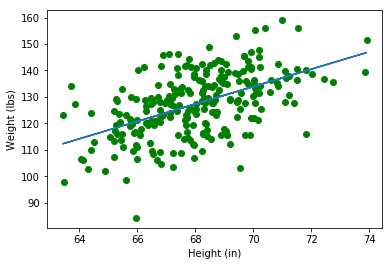

MSE= 683.944701765


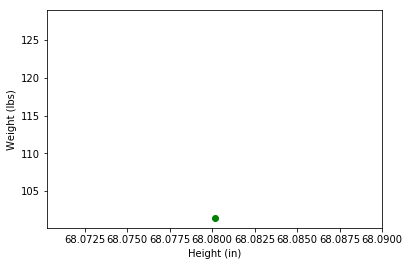

MSE= 107.453584692


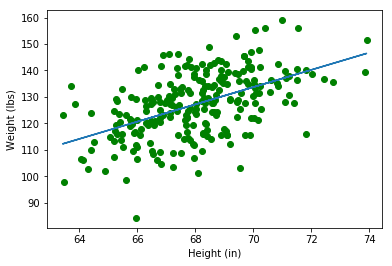

MSE= 113.270437138


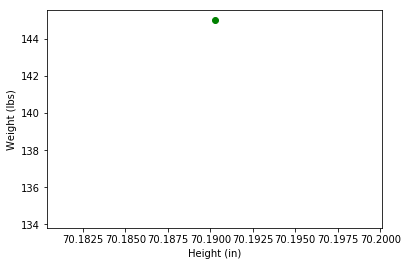

MSE= 107.634779227


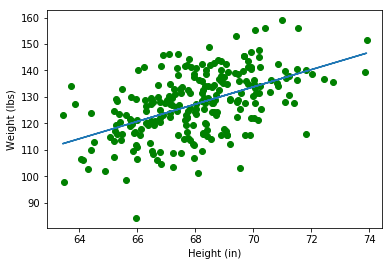

MSE= 68.0161667976


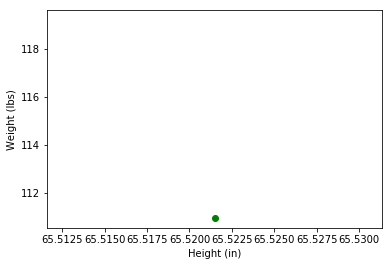

MSE= 107.685139021


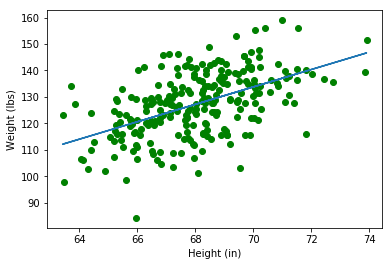

MSE= 55.0358250763


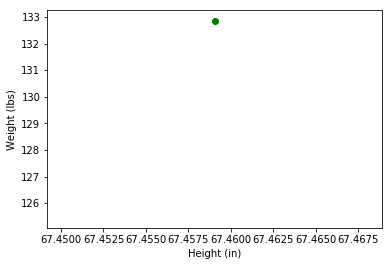

MSE= 106.115918745


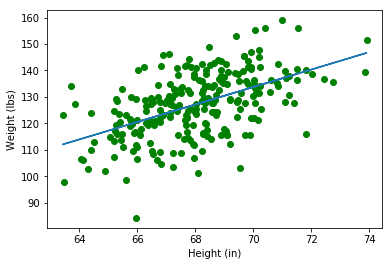

MSE= 445.924772


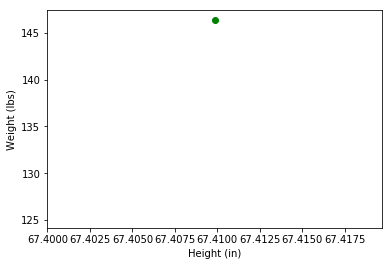

MSE= 107.232658423


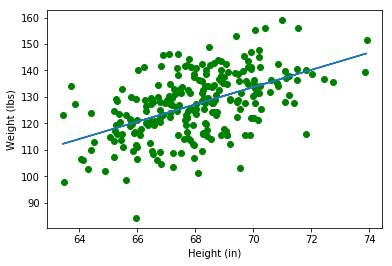

MSE= 168.19436906


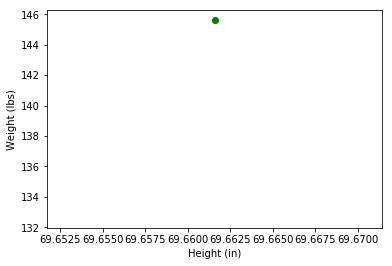

MSE= 107.90333326


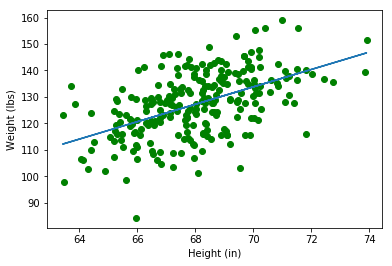

MSE= 0.691420027736


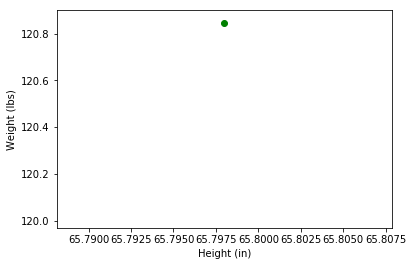

MSE= 107.794131196


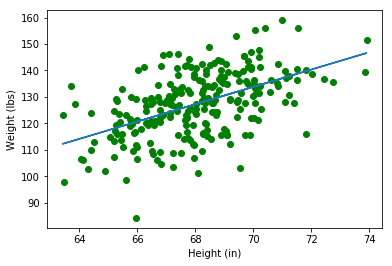

MSE= 27.9893009284


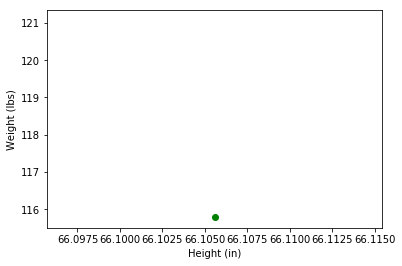

MSE= 107.905819935


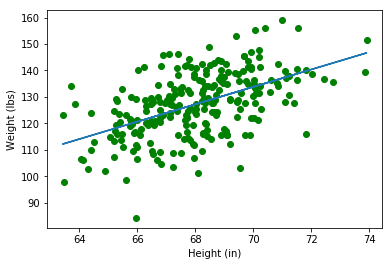

MSE= 0.0685632487787


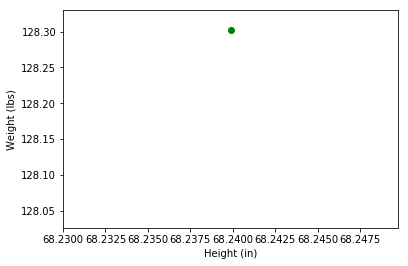

MSE= 107.906016226


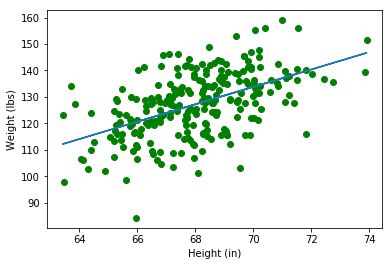

MSE= 0.0196827319945


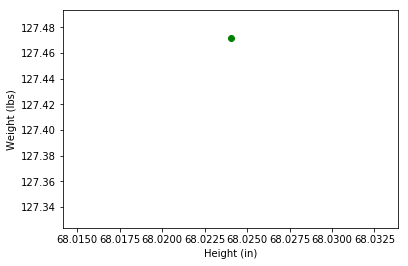

MSE= 107.452765814


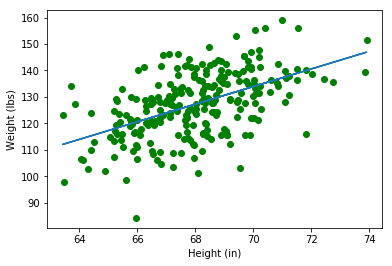

MSE= 114.319144109


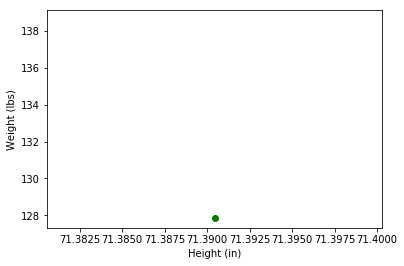

MSE= 107.894349818


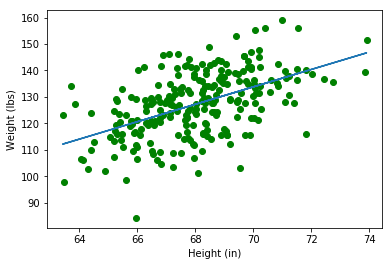

MSE= 2.94122707747


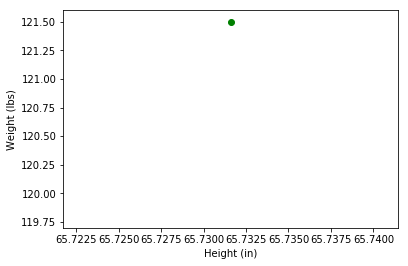

MSE= 107.547974379


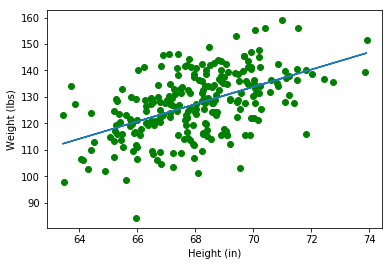

MSE= 89.412940228


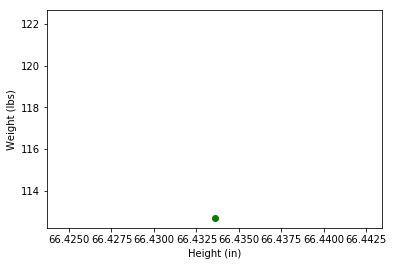

MSE= 107.900850219


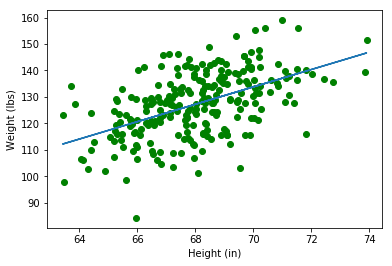

MSE= 1.31184208045


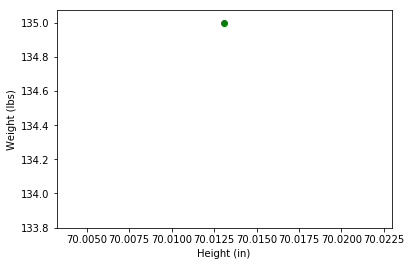

MSE= 107.858044632


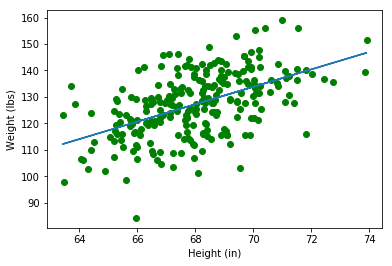

MSE= 11.993435483


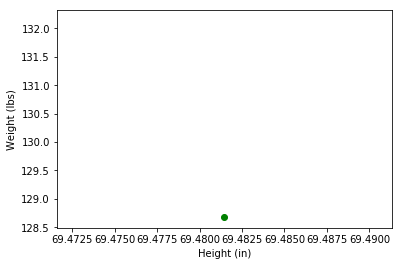

MSE= 107.808499642


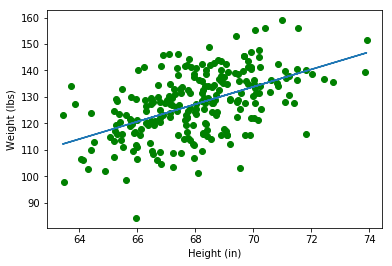

MSE= 24.3117829753


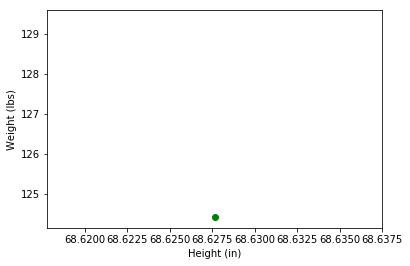

MSE= 107.36301263


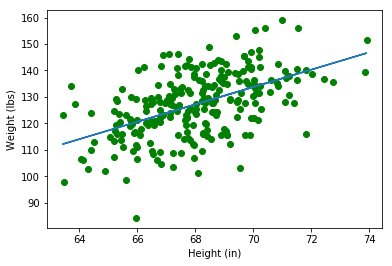

MSE= 135.246992977


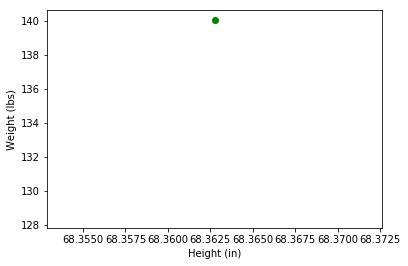

MSE= 107.414696176


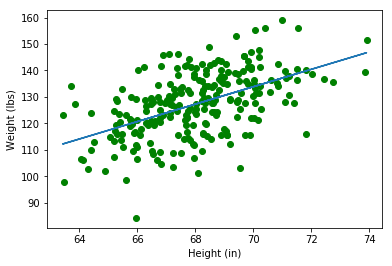

MSE= 122.378721042


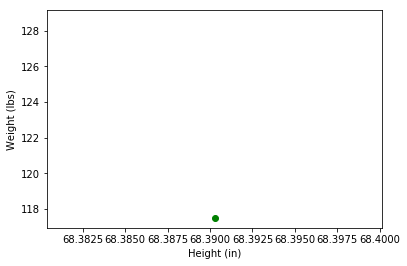

MSE= 107.103251574


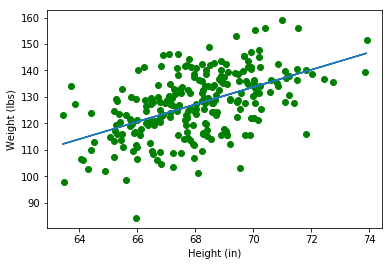

MSE= 200.039212534


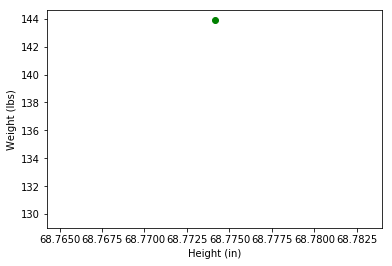

MSE= 107.67142631


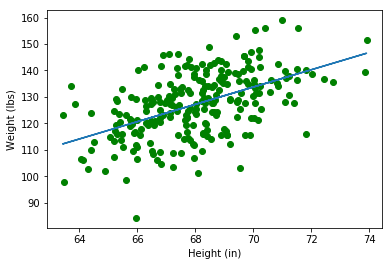

MSE= 58.670381068


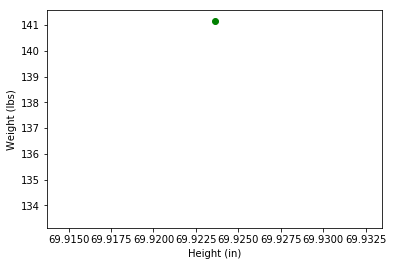

MSE= 106.718464396


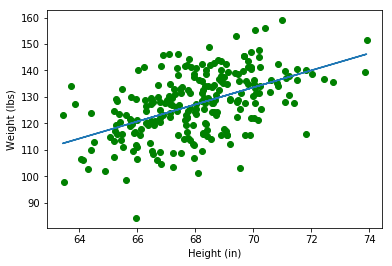

MSE= 299.874341498


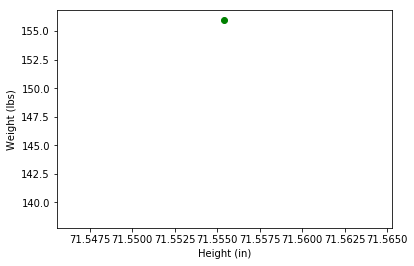

MSE= 107.792963298


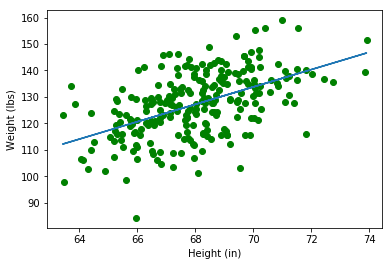

MSE= 28.1760273915


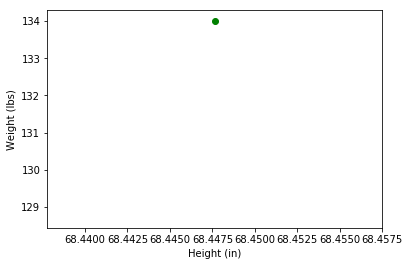

MSE= 107.70341617


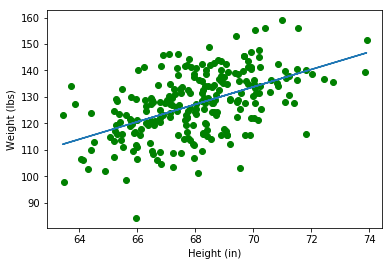

MSE= 50.5589096696


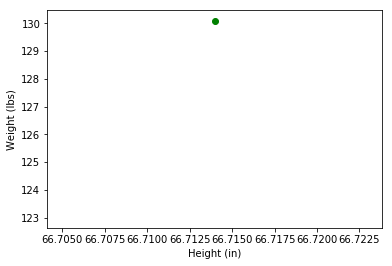

MSE= 106.774328162


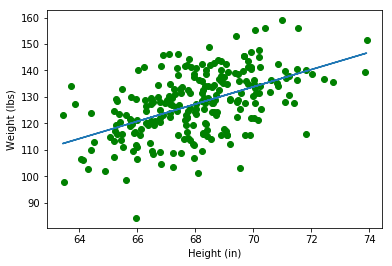

MSE= 282.346807504


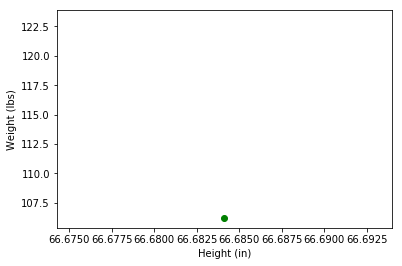

MSE= 106.995510699


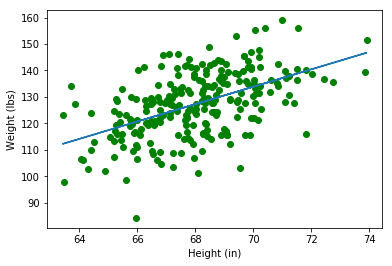

MSE= 226.736574904


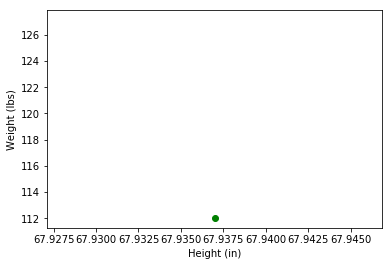

MSE= 107.761023142


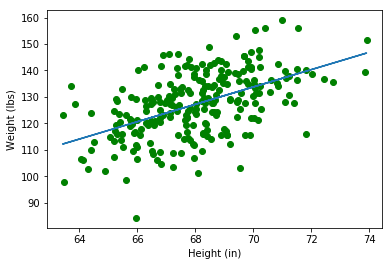

MSE= 36.1549024012


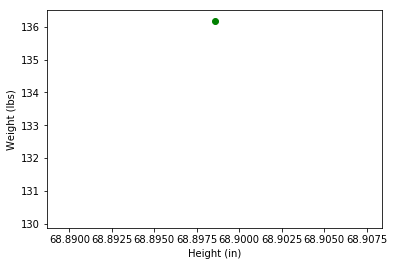

MSE= 107.744860777


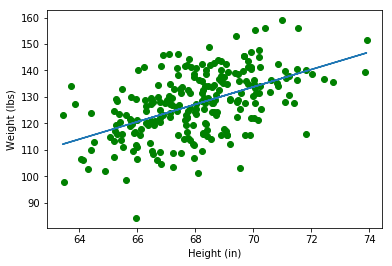

MSE= 40.1695304011


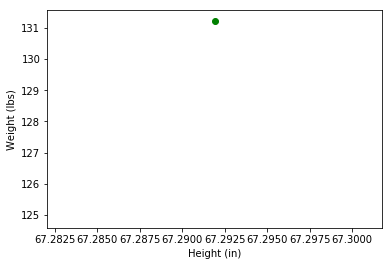

MSE= 107.901231542


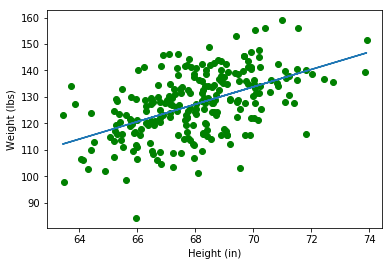

MSE= 1.21435599905


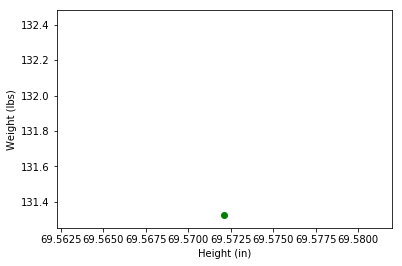

MSE= 107.726570884


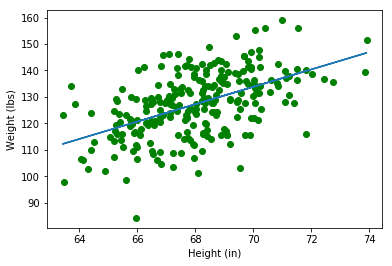

MSE= 44.7067799768


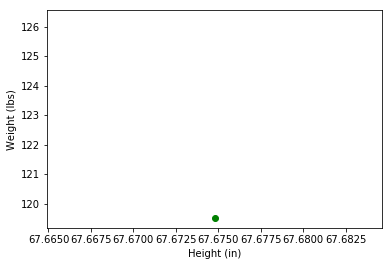

MSE= 107.147743625


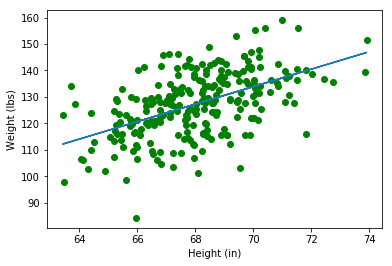

MSE= 189.054038187


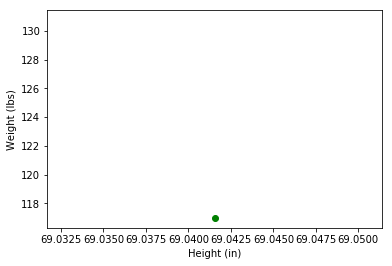

MSE= 107.381918716


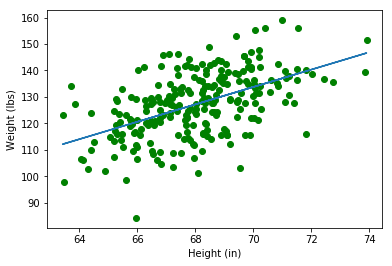

MSE= 130.520121075


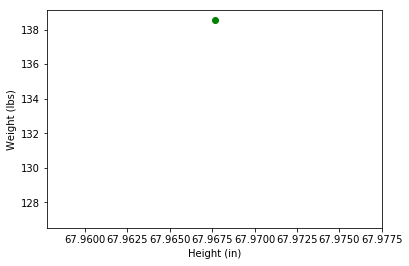

MSE= 107.457026138


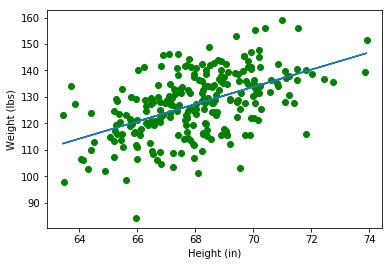

MSE= 112.393769605


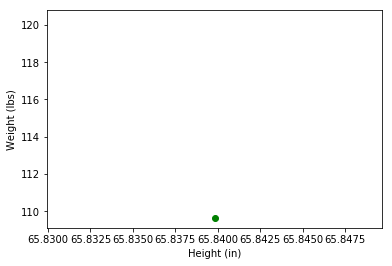

MSE= 107.480914954


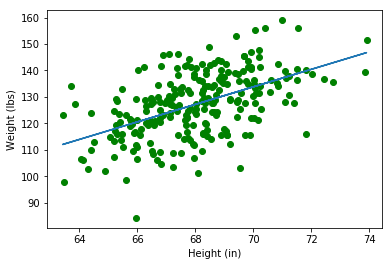

MSE= 106.449305762


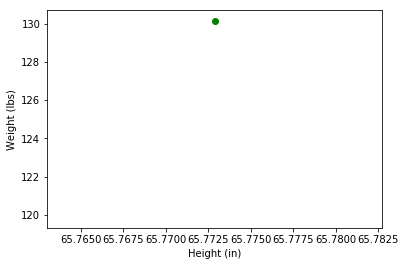

MSE= 107.905227778


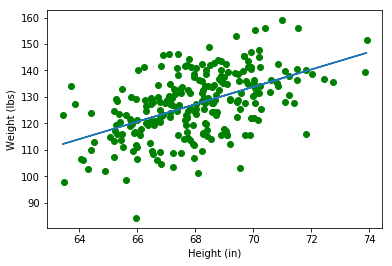

MSE= 0.218367099635


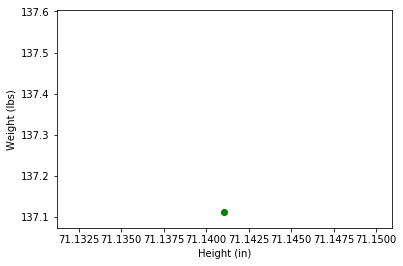

MSE= 107.228440524


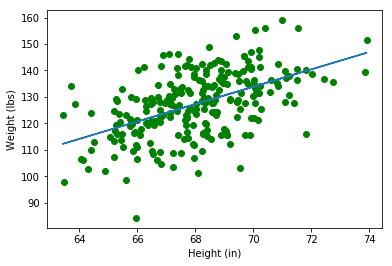

MSE= 168.74140356


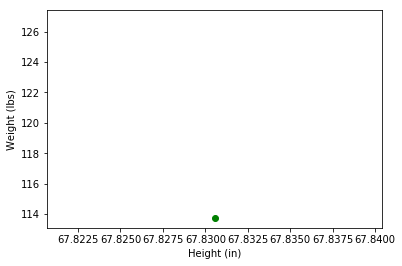

MSE= 107.877328686


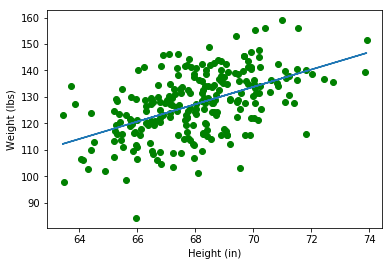

MSE= 7.23102202681


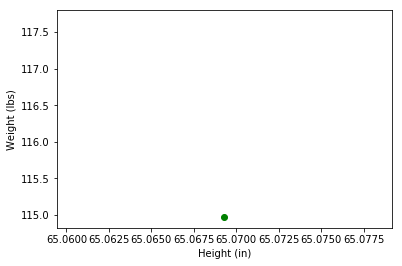

MSE= 107.798485216


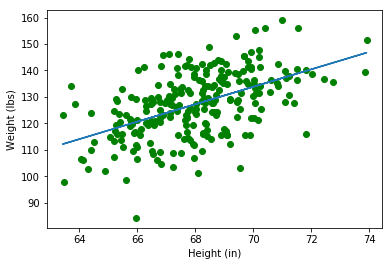

MSE= 26.8807377428


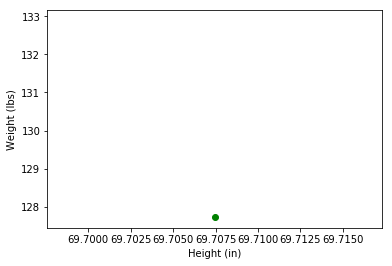

MSE= 107.35951099


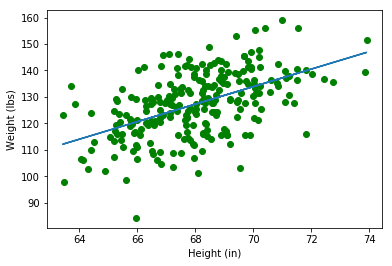

MSE= 136.656996658


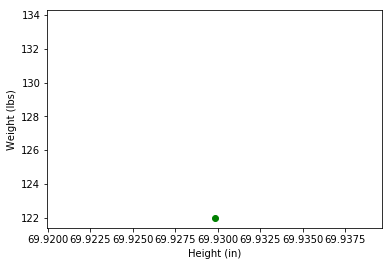

MSE= 107.866978783


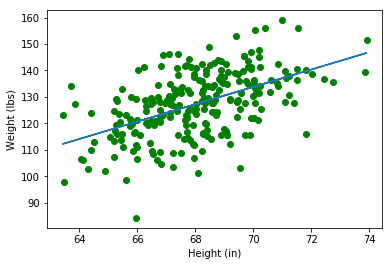

MSE= 9.77810978527


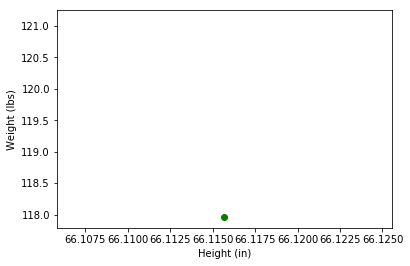

MSE= 107.896303214


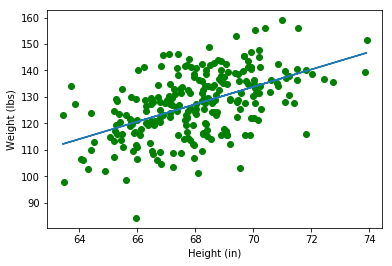

MSE= 2.43922589194


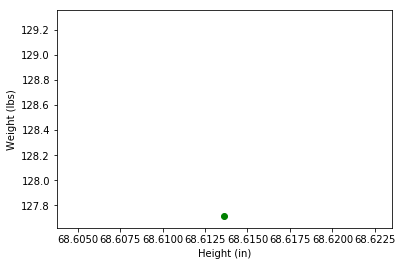

MSE= 107.265871921


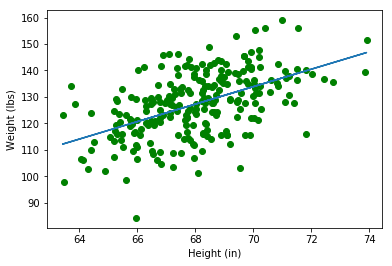

MSE= 159.589436771


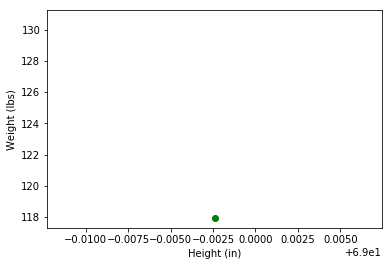

MSE= 107.891890818


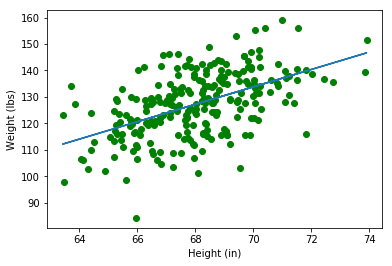

MSE= 3.54258872686


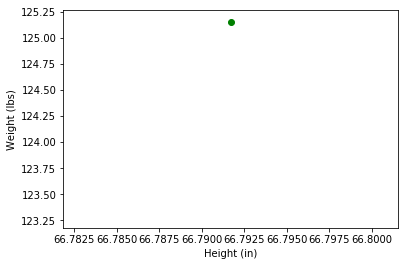

MSE= 107.138237974


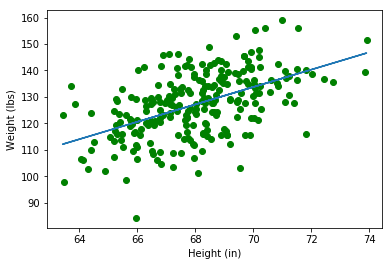

MSE= 191.196575369


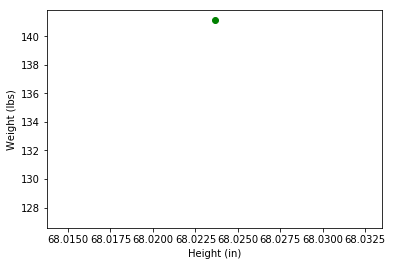

MSE= 107.247539743


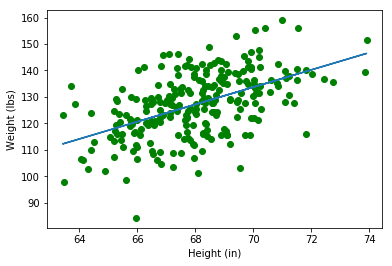

MSE= 164.484312233


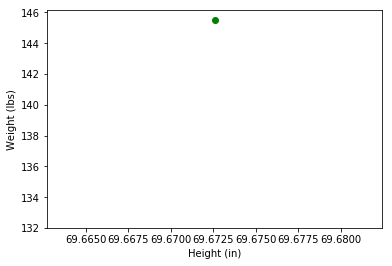

MSE= 105.58669419


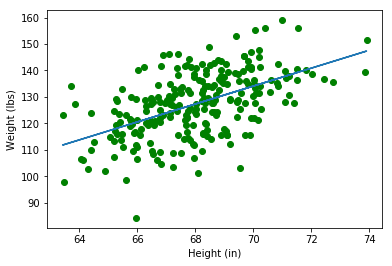

MSE= 586.92602044


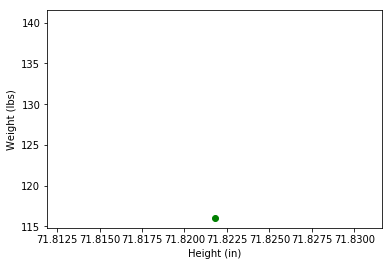

MSE= 107.696791368


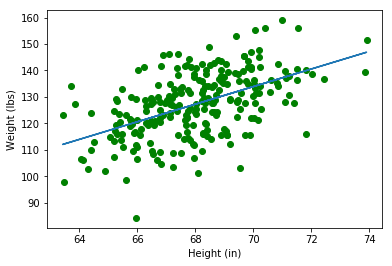

MSE= 53.4363255599


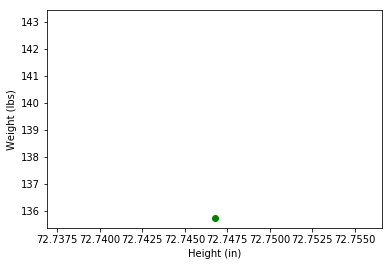

MSE= 107.644337935


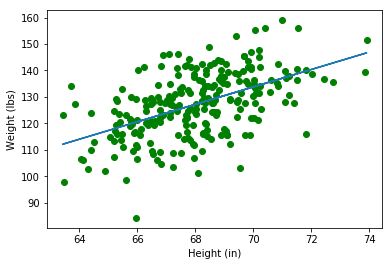

MSE= 65.2147902133


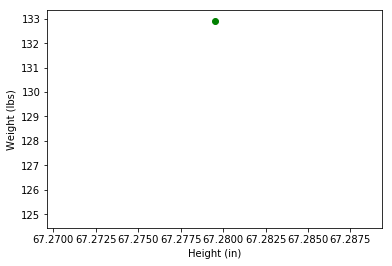

MSE= 107.528691312


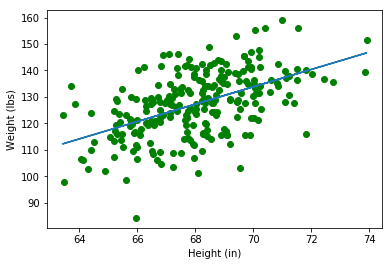

MSE= 94.0095571753


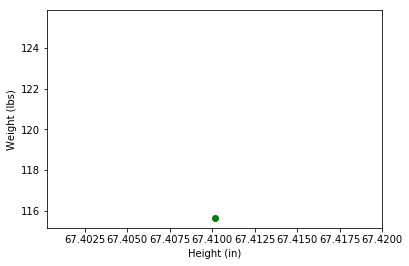

MSE= 107.033271233


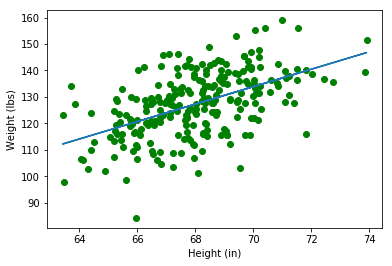

MSE= 217.400292226


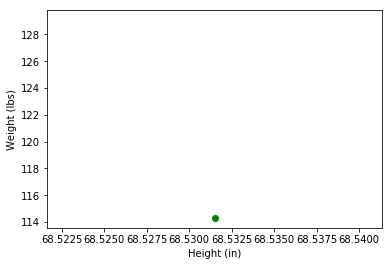

MSE= 106.261786426


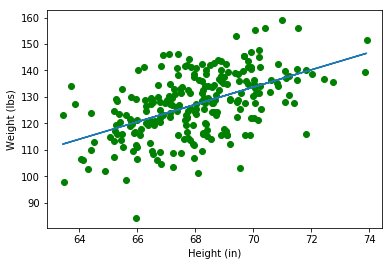

MSE= 409.532239719


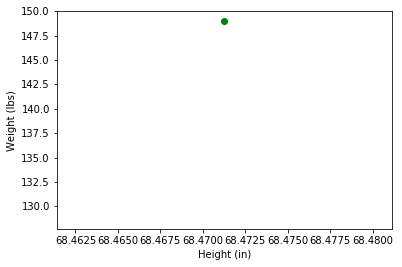

MSE= 107.197178019


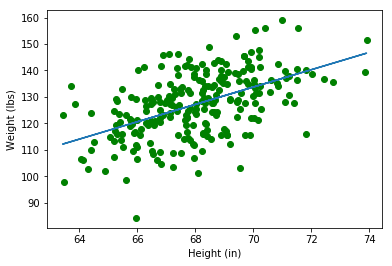

MSE= 176.572295592


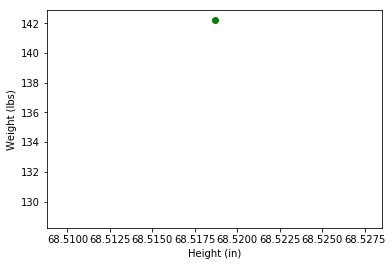

MSE= 106.102582186


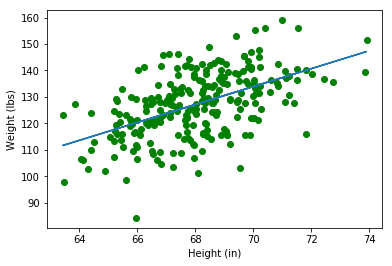

MSE= 458.260389392


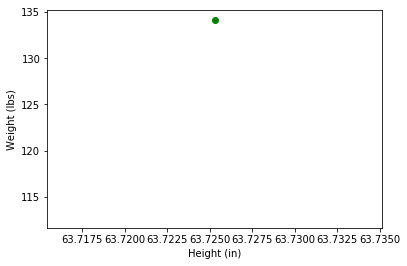

MSE= 106.919599491


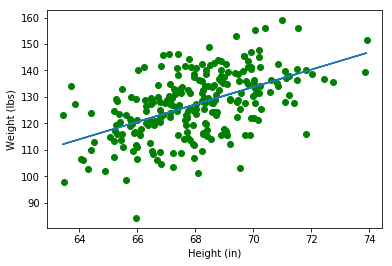

MSE= 245.66106362


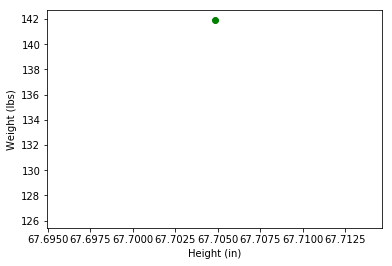

MSE= 107.726179977


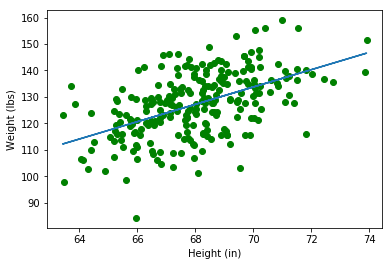

MSE= 44.9053421316


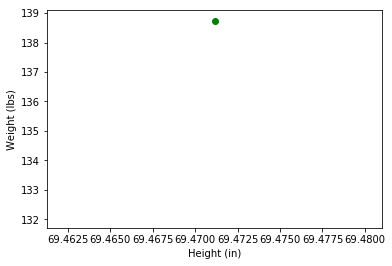

MSE= 107.373413128


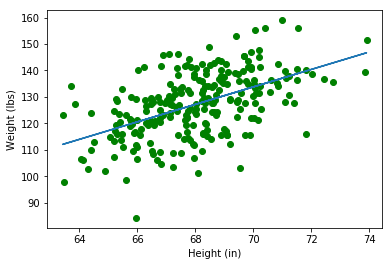

MSE= 132.883690156


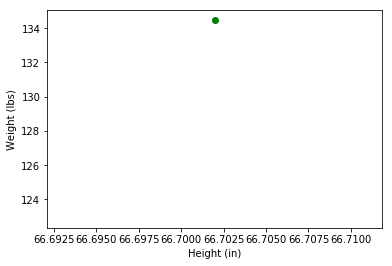

MSE= 107.900781079


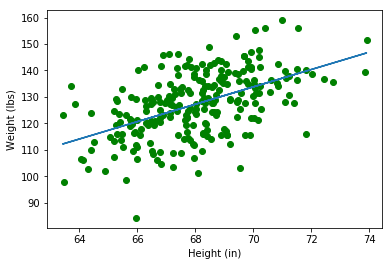

MSE= 1.33445831838


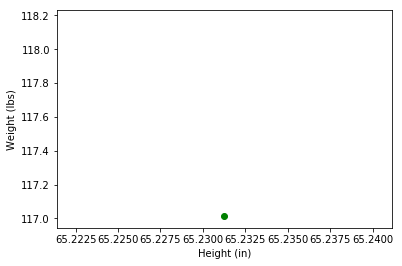

MSE= 106.617968271


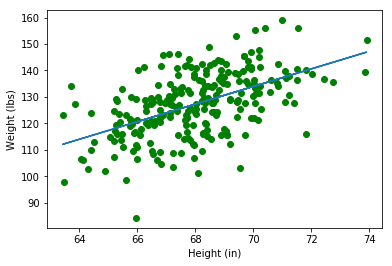

MSE= 322.009930862


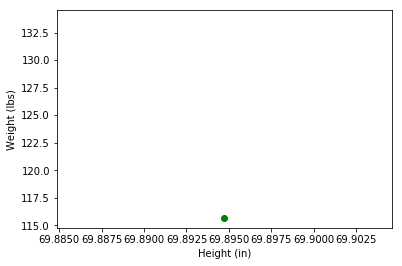

MSE= 107.896656621


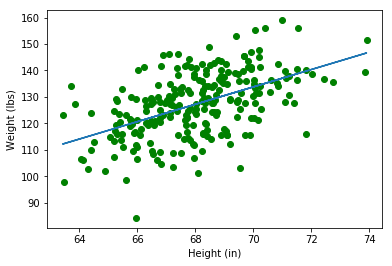

MSE= 2.35888246773


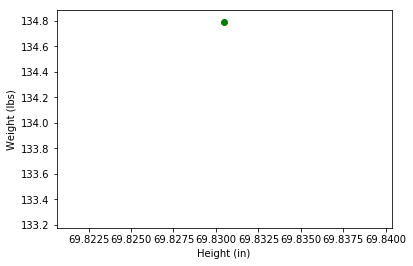

MSE= 107.891838119


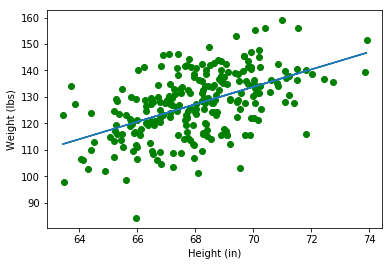

MSE= 3.57660328059


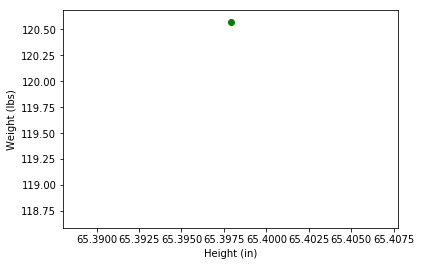

MSE= 107.631987285


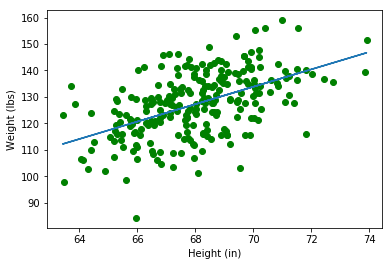

MSE= 68.2606120579


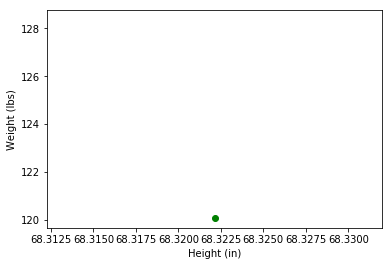

MSE= 102.598677926


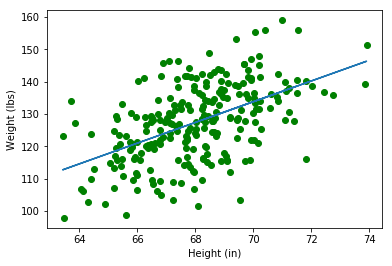

MSE= 1327.73665157


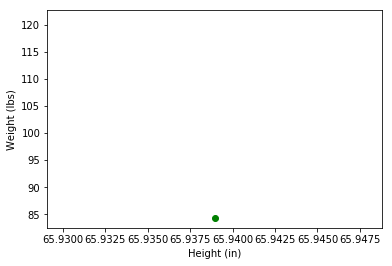

Average Training-MSE: 107.902632868
Average Test-MSE: 27189.1218847


In [5]:
#Leave One Out Cross Validation
from sklearn.model_selection import LeaveOneOut
#load data
data=pd.read_excel('Book.xlsx')
mat1=data.as_matrix()
data=np.transpose(data.as_matrix())

#plot the data
x=data[1]
y=data[2]
loo = LeaveOneOut()
loo.get_n_splits(x)

#sklearn.cross_validation.LeaveOneOut(n=4)
#for train, test in loo:
    #print (train, test)
sum1=0
sum2=0
for train_index, test_index in loo.split(x):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print(x_train, x_test, y_train, y_test)
    

#plot the data

    a=np.zeros((len(x_train)))
    b=np.zeros((len(x_train)))
    err=np.zeros((len(x_train)))

    plt.scatter(x_train,y_train,c='green')
    plt.xlabel("Height (in)")
    plt.ylabel("Weight (lbs)")

    def func(x_train,a1,b1): return a1+b1*x_train
    x0=np.array([0.0,0.0])
    optpar=optimization.curve_fit(func,x_train,y_train,x0)

    a=optpar[0][0]
    b=optpar[0][1]

    plt.plot(x_train,a+b*x_train)

    s=0
    for n in range(np.size(x_train)):
        s=s+(y_train[n]-(a+b*x_train[n]))**2

    print("MSE=", s/np.size(x_train))
    sum1+=s/np.size(x_train)
    plt.show()

#plot the data
    
    plt.scatter(x_test,y_test,c='green')
    plt.xlabel("Height (in)")
    plt.ylabel("Weight (lbs)")

    plt.plot(x_test,a+b*x_test)

    s=0
    for n in range(np.size(x_test)):
        s=s+(y_test[n]-(a+b*x_test[n]))**2

    print("MSE=", s/np.size(x_test))
    sum2+=s/np.size(x_test)
    plt.show()
print("Average Training-MSE:",sum1/len(y_train))
print("Average Test-MSE:",sum2/len(y_test))